In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\rock_density_xray.csv')

In [27]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [28]:
df.shape

(300, 2)

In [29]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

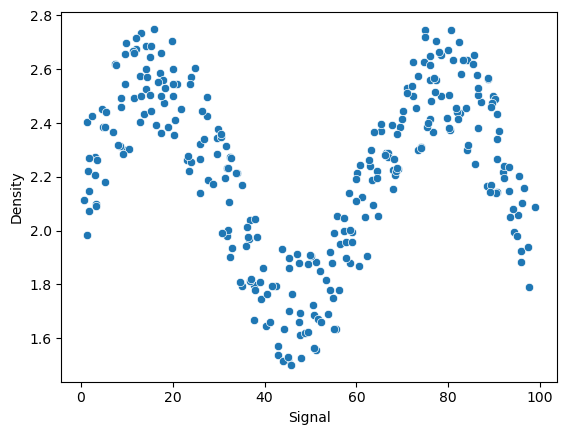

In [30]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr_model = LinearRegression()

In [33]:
X = df.drop('Density',axis =1).values.reshape(-1,1)

In [34]:
y = df['Density']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(y_test,y_pred)

0.2369211828242142

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.29280140172610514

In [42]:
y_pred

array([2.23677119, 2.20970069, 2.22783457, 2.22977621, 2.2217074 ,
       2.20554045, 2.21733989, 2.23793703, 2.22927442, 2.23668475,
       2.21906301, 2.20614184, 2.21549894, 2.21832078, 2.21081993,
       2.23266776, 2.23121143, 2.23531968, 2.22855625, 2.2282293 ,
       2.23735453, 2.22609925, 2.23174767, 2.23534457, 2.21719859,
       2.21530785, 2.21919176, 2.22086182, 2.2079445 , 2.21011411,
       2.21129521, 2.21563332, 2.20952651, 2.21953688, 2.22584566,
       2.21915351, 2.23550111, 2.22447941, 2.22706067, 2.21412205,
       2.21325758, 2.22962443, 2.21557876, 2.23168476, 2.21201089,
       2.22977892, 2.21320954, 2.22251306, 2.2317693 , 2.2205388 ,
       2.23461924, 2.21455213, 2.21148436, 2.21004977, 2.21524109,
       2.21534935, 2.21860404, 2.22323015, 2.22126499, 2.20696345,
       2.23072186, 2.22147971, 2.23419107, 2.21677029, 2.21284061,
       2.22852663, 2.20793571, 2.20611642, 2.23753635, 2.20631527,
       2.2257516 , 2.22817828, 2.23703581, 2.22493841, 2.21559

In [43]:
y_test

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
         ...   
282    2.236675
242    2.567965
119    2.342038
57     2.056288
37     2.309545
Name: Density, Length: 90, dtype: float64

In [44]:
signals = np.arange(0,101).reshape(-1,1)
densities = lr_model.predict(signals)

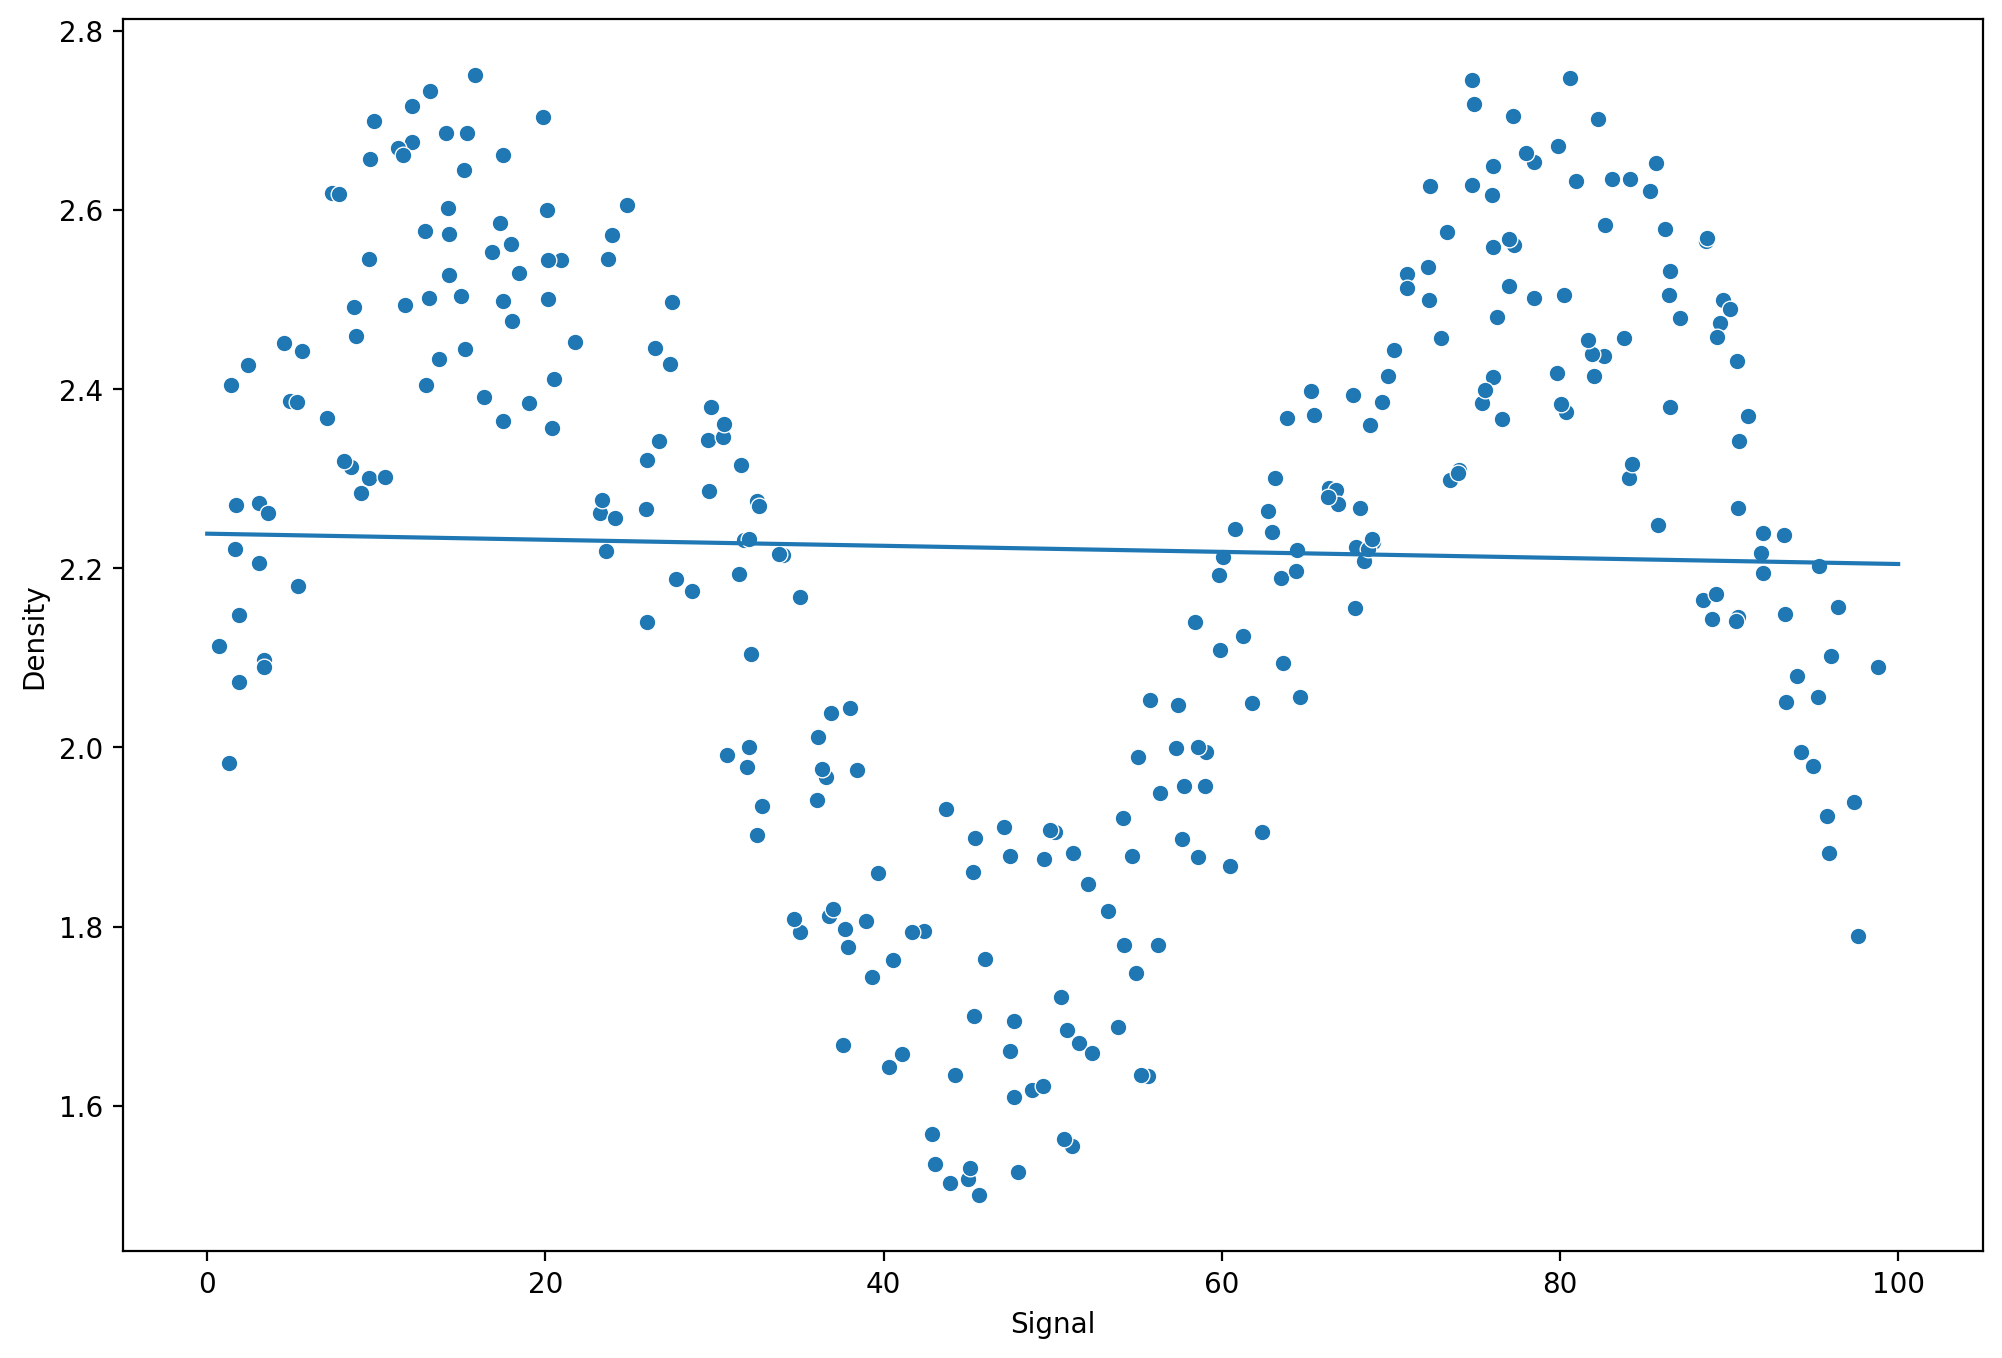

In [45]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signals,densities)

In [86]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test,preds)
    mse = mean_squared_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'MSE:{mse}')
    signals = np.arange(0,101).reshape(-1,1)
    densities = model.predict(signals)
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='red')
    plt.plot(signals,densities)

MAE:0.2369211828242142
MSE:0.08573266085277201


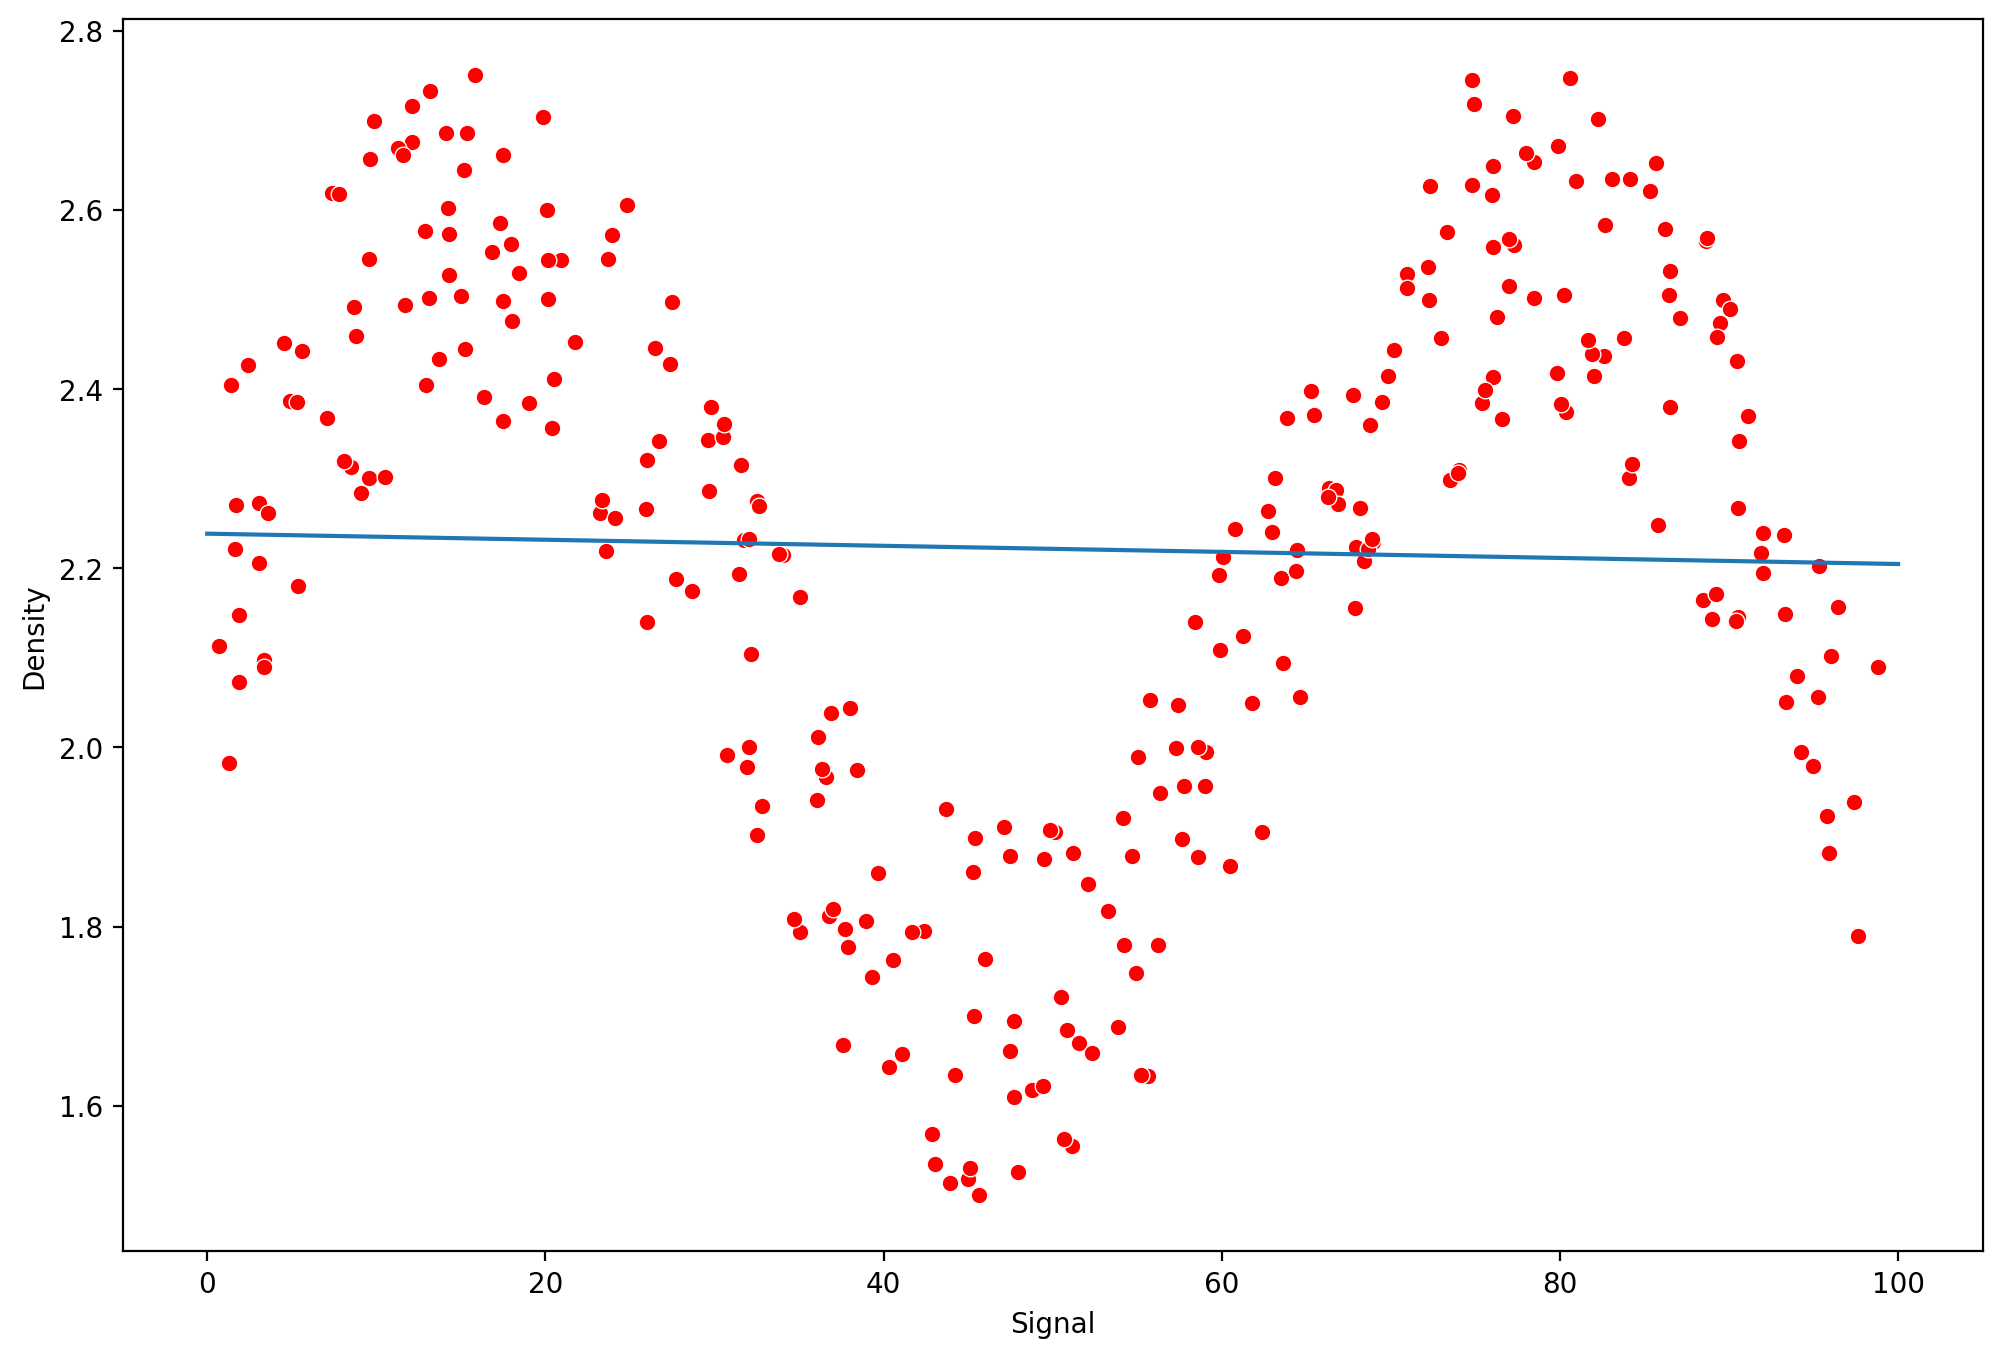

In [87]:
run_model(lr_model,X_train,X_test,y_train,y_test)

In [88]:
from sklearn.pipeline import make_pipeline

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
pipe =make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE:0.23856273226353808
MSE:0.0815201395532426


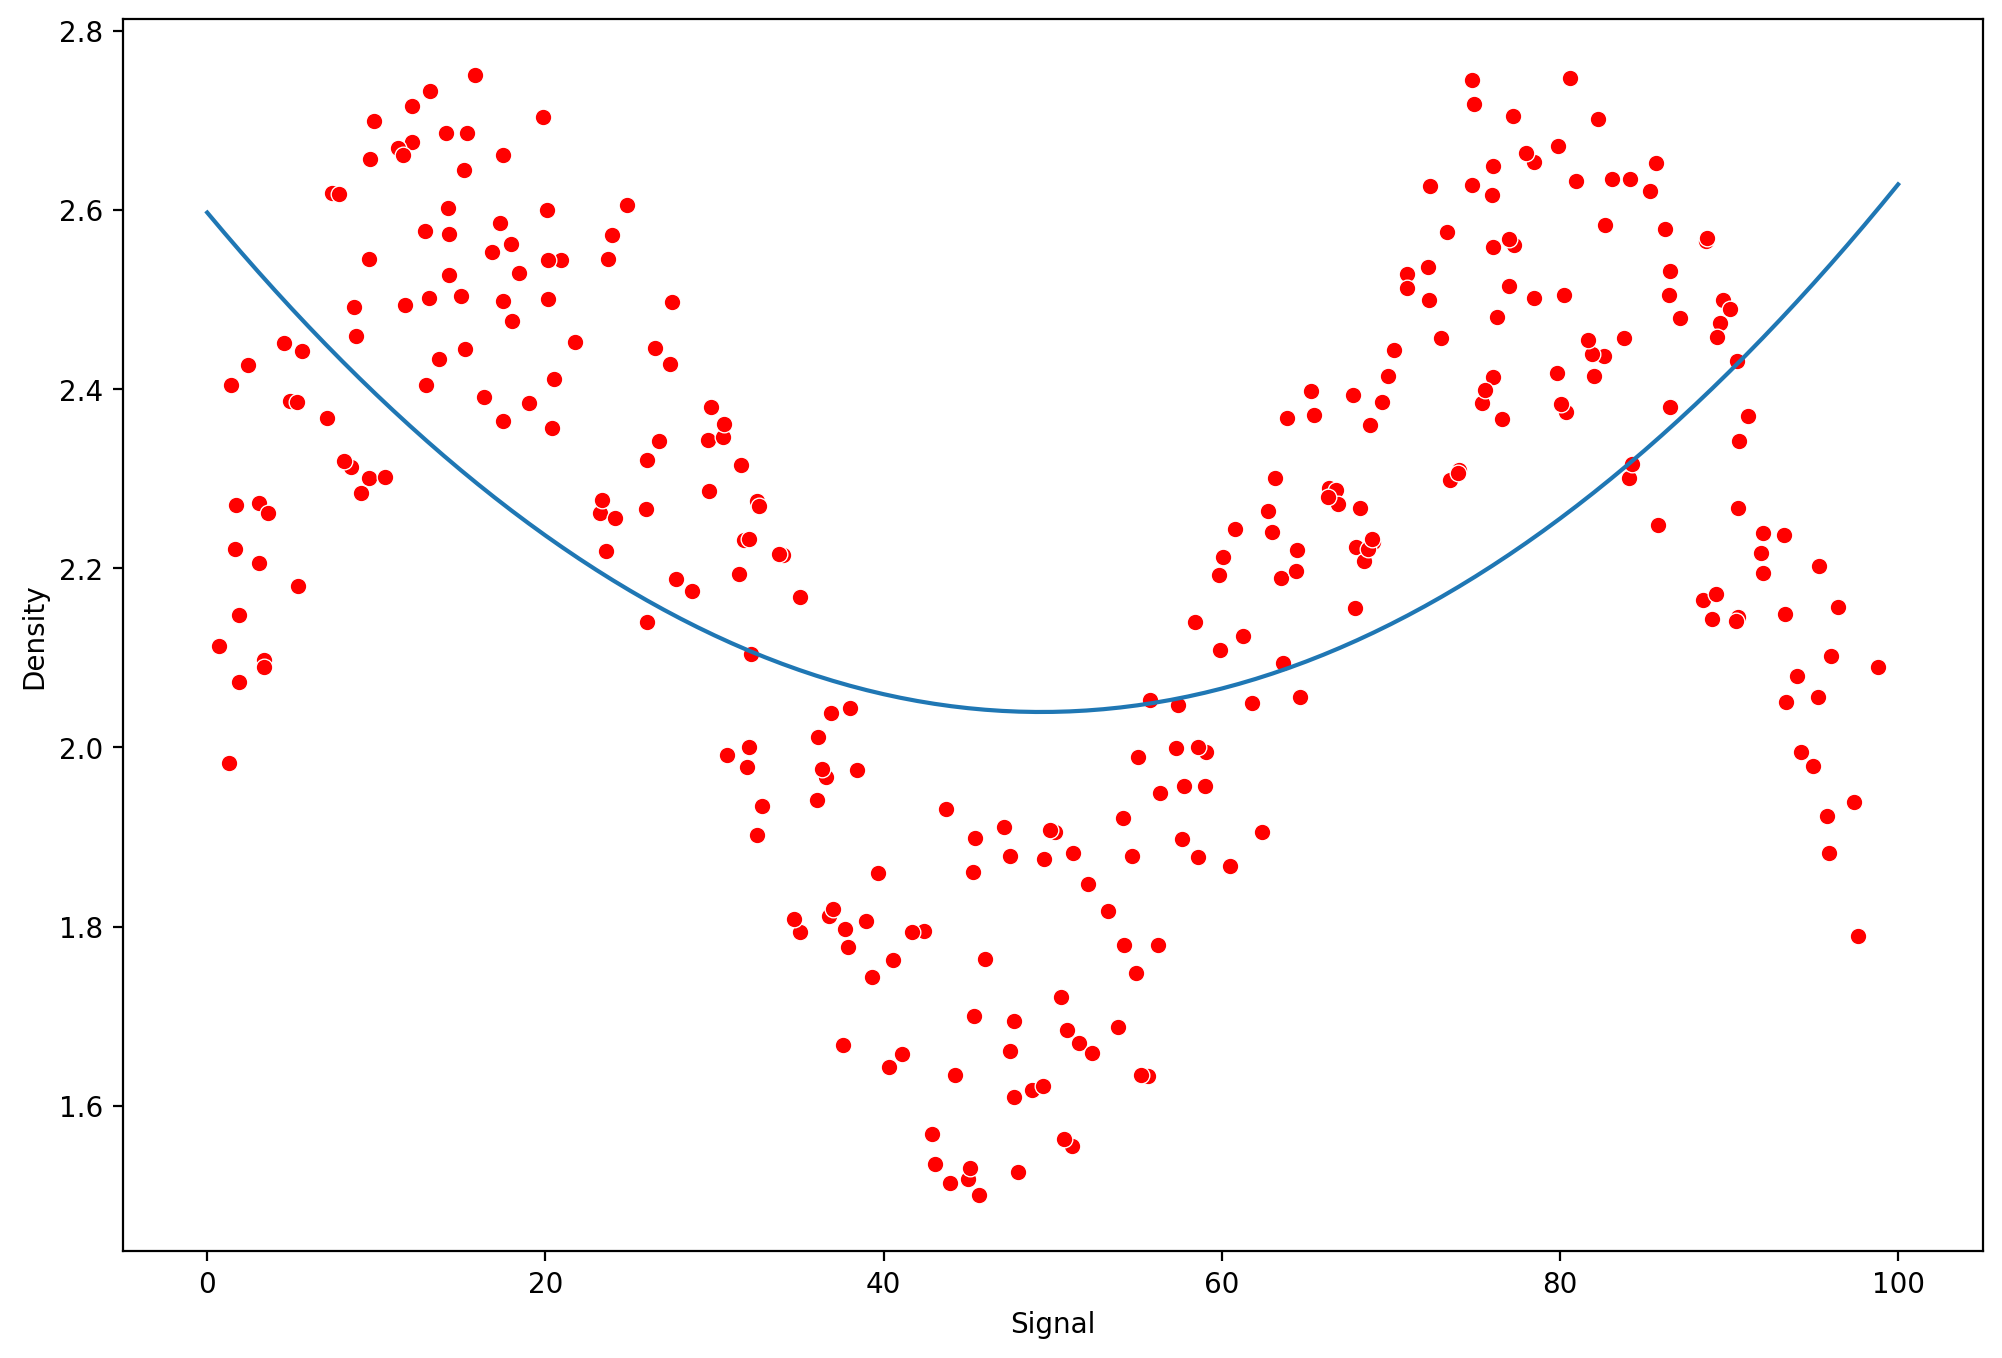

In [91]:
run_model(pipe,X_train,X_test,y_train,y_test)

MAE:0.12055850812358568
MSE:0.02059550116983048


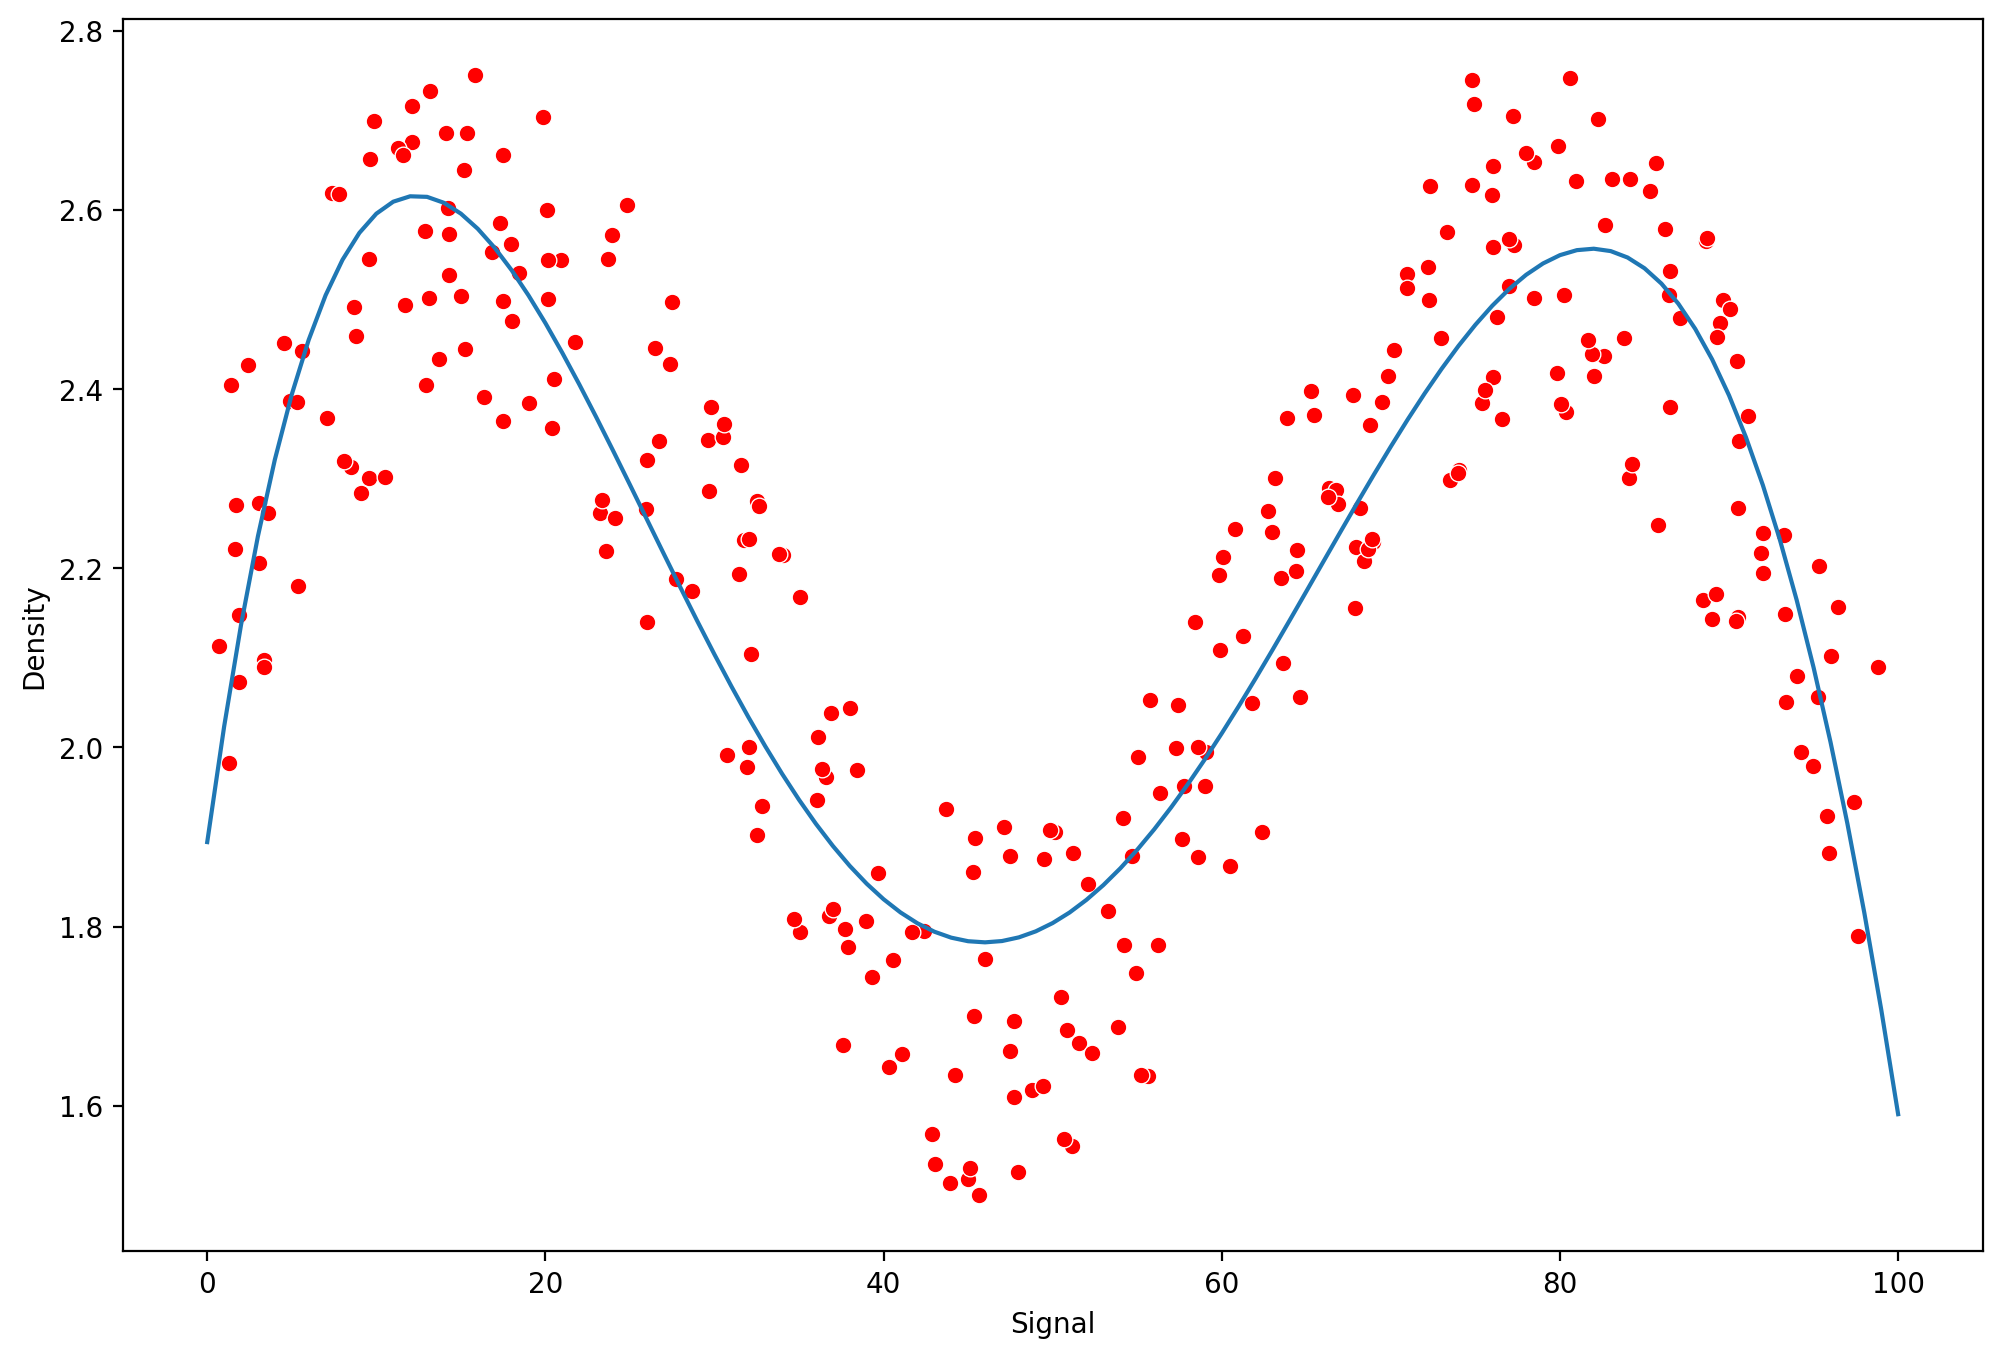

In [92]:
pipe =make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

MAE:0.11503326528331023
MSE:0.017763843004521527


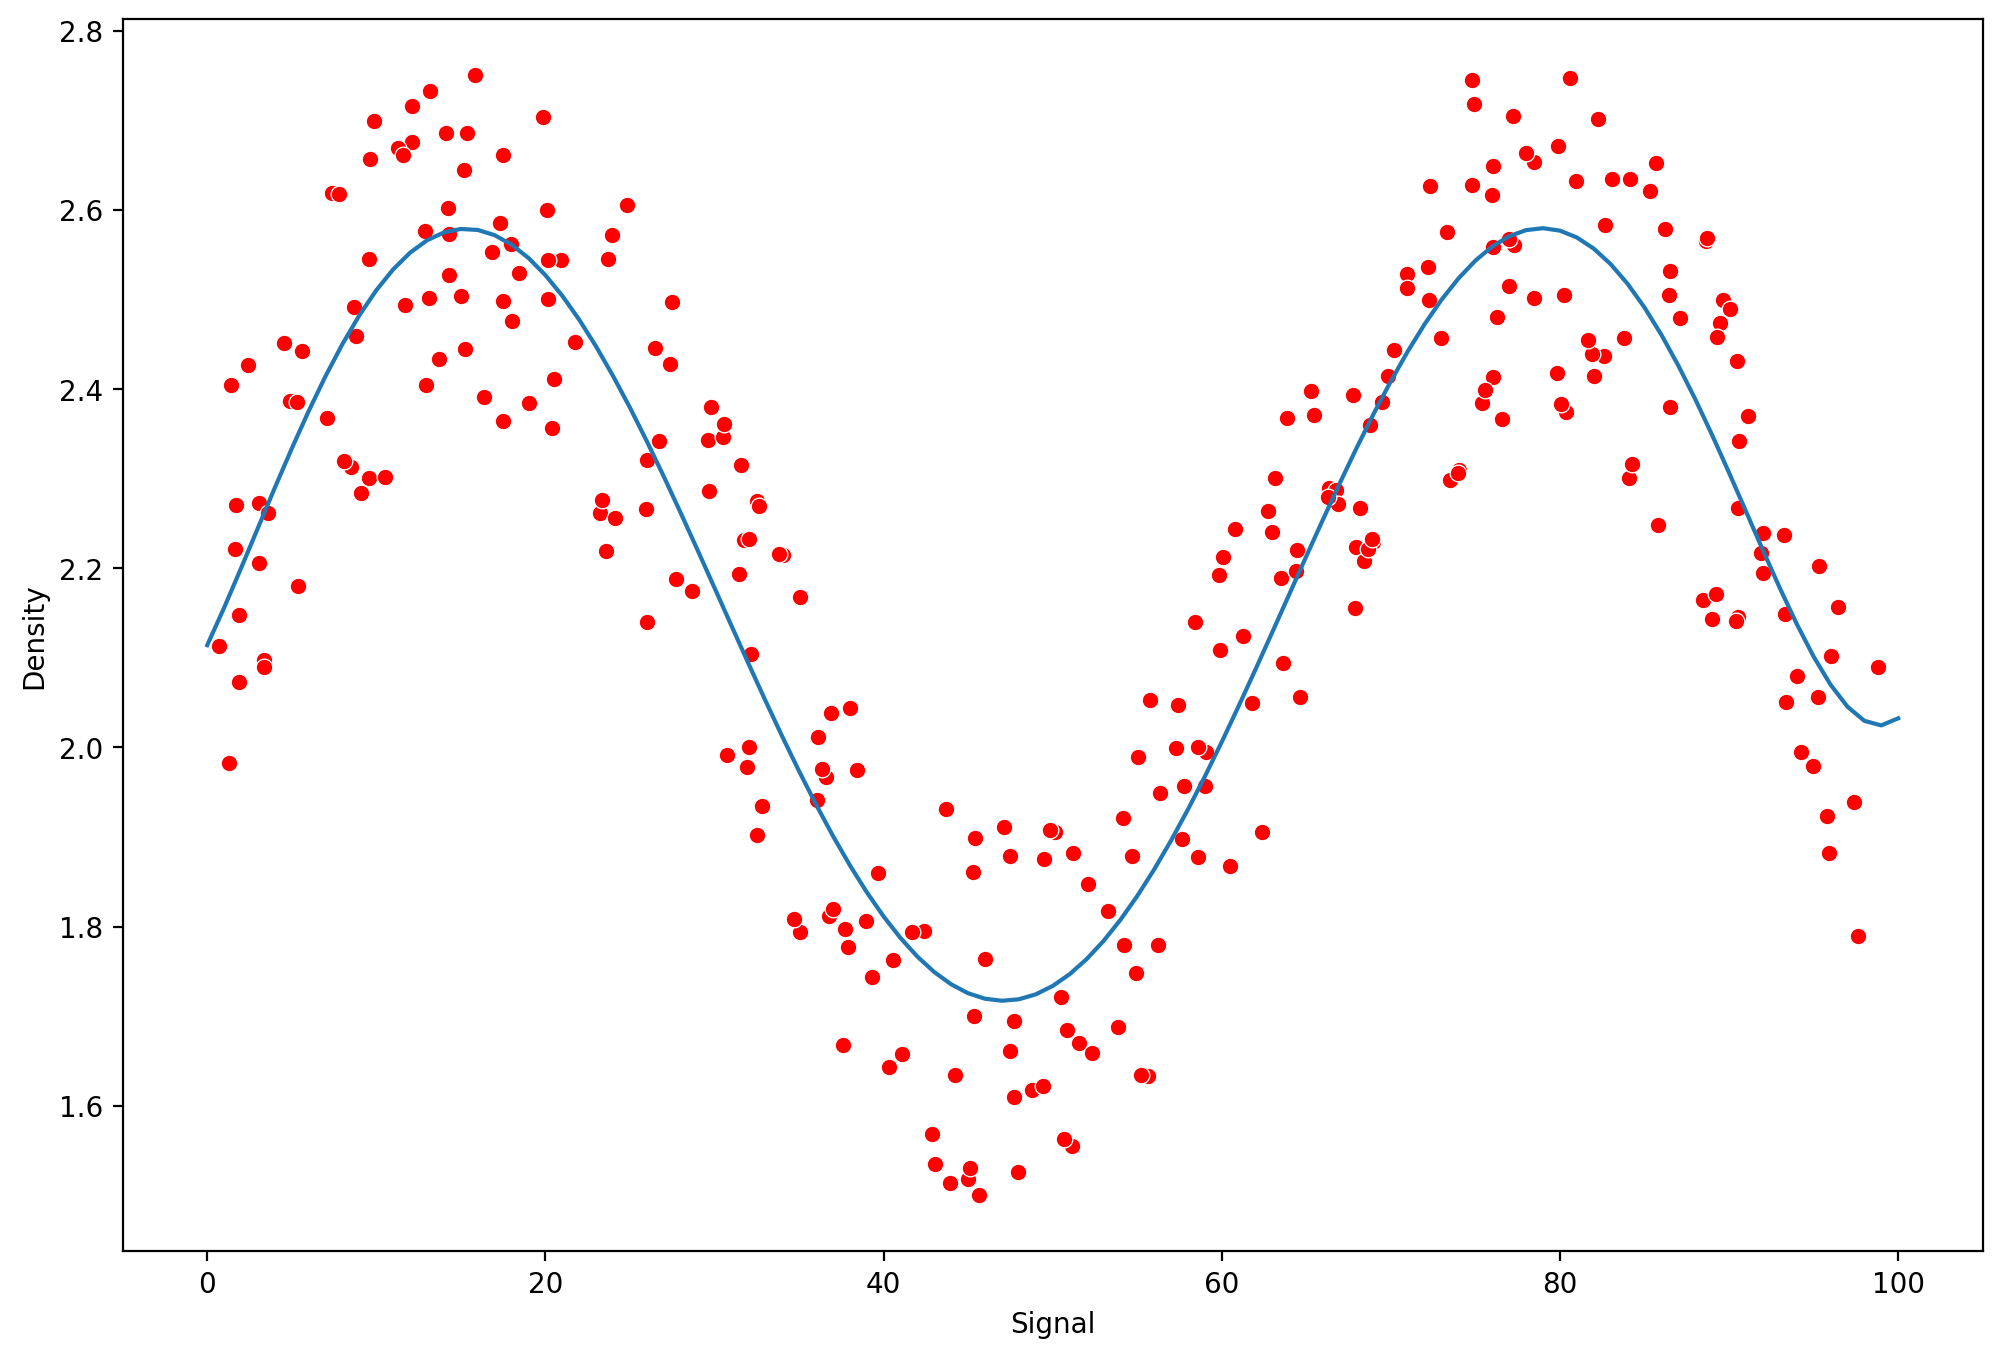

In [93]:
pipe =make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

MAE:0.11471653594074407
MSE:0.017599353427425326


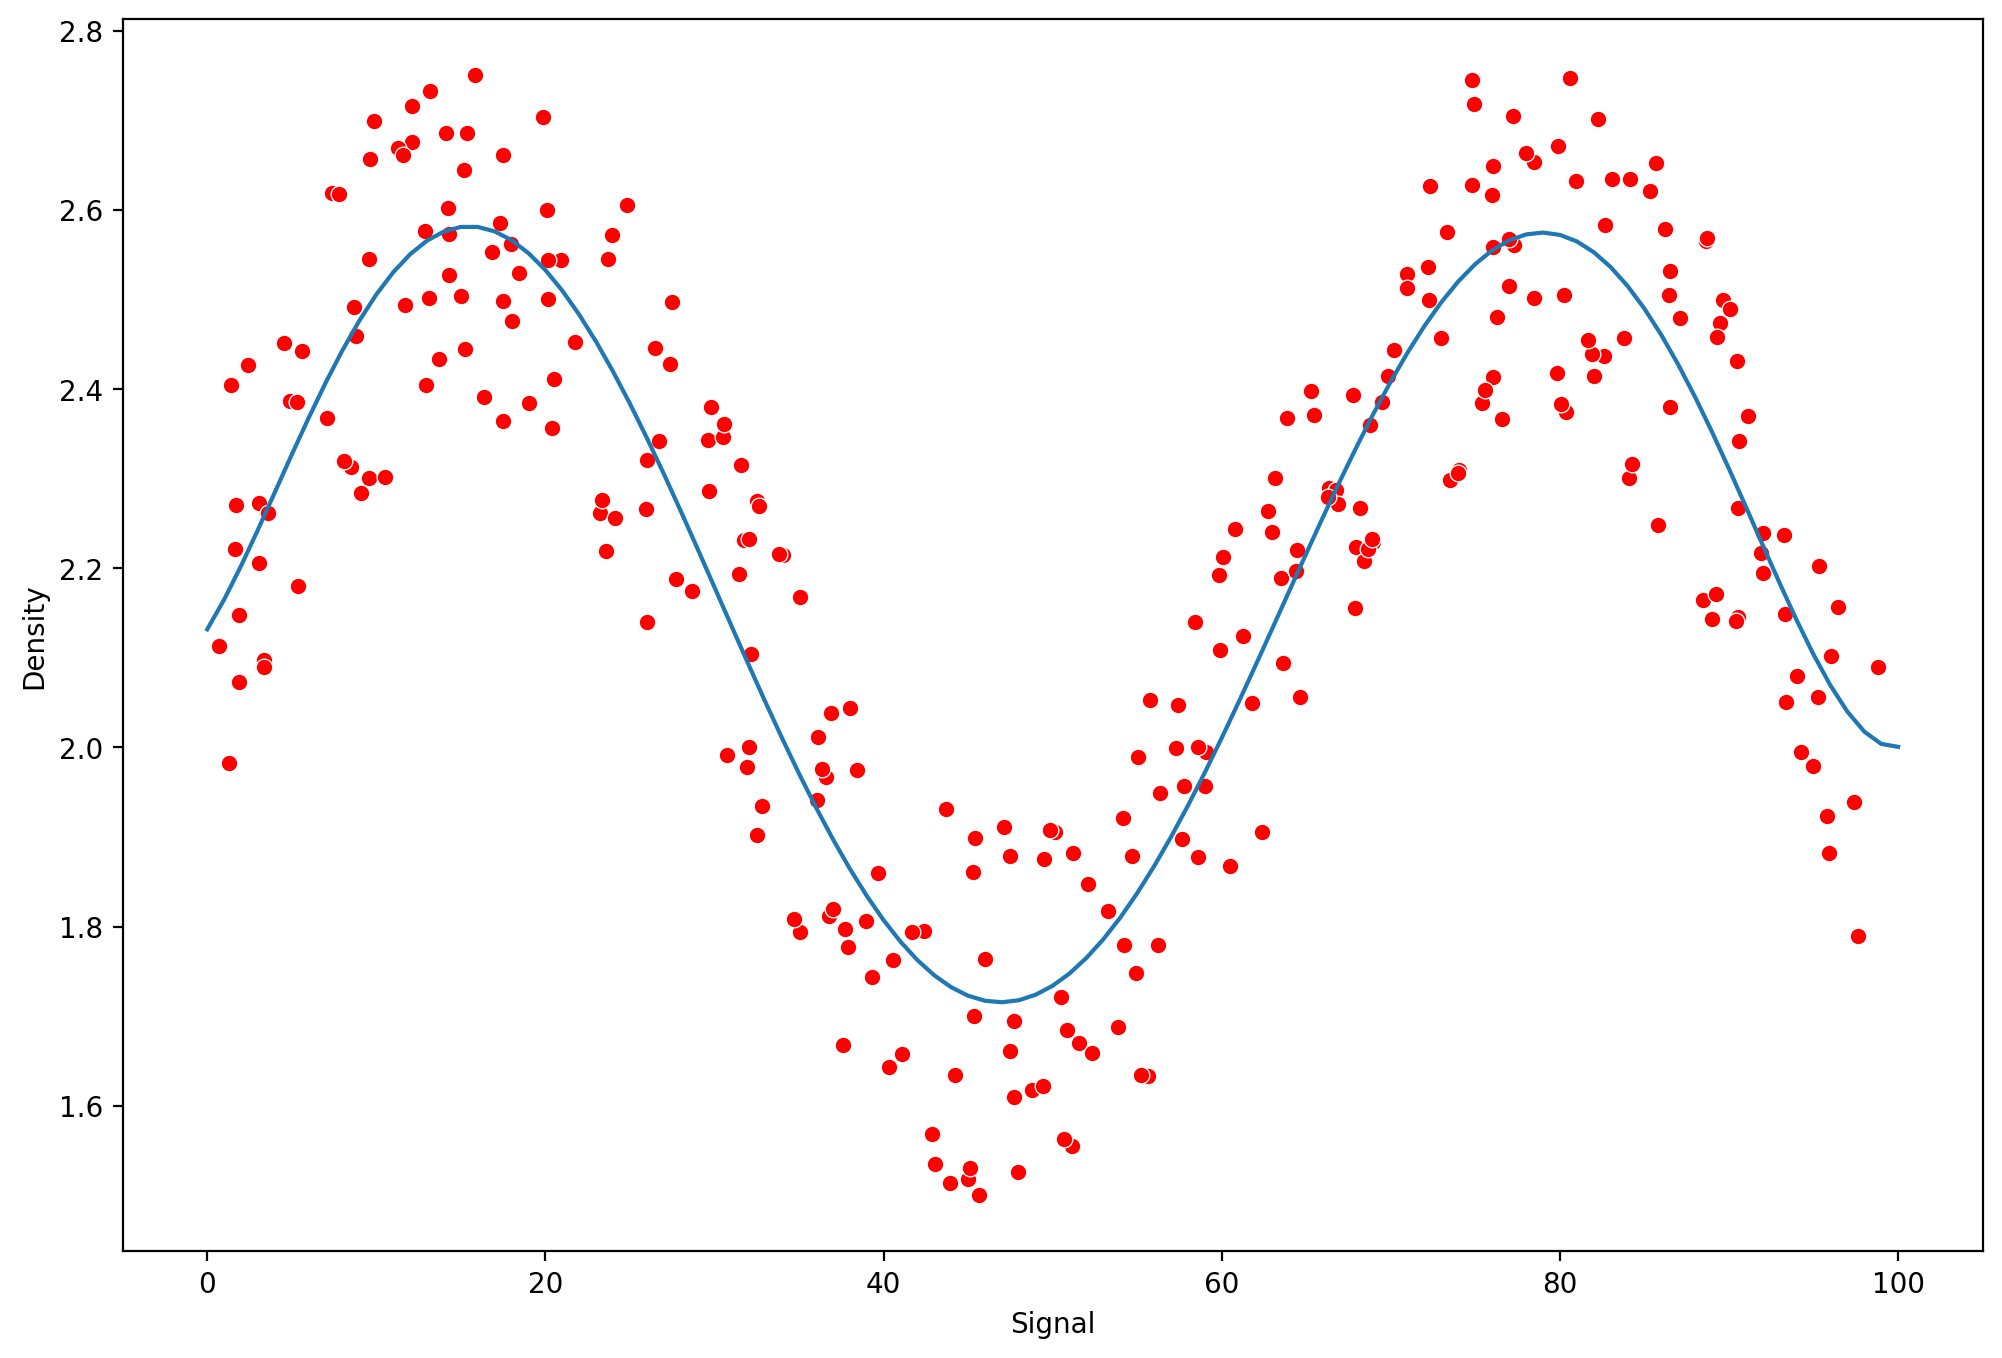

In [94]:
pipe =make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

MAE:0.1505076311699491
MSE:0.03417588242320723


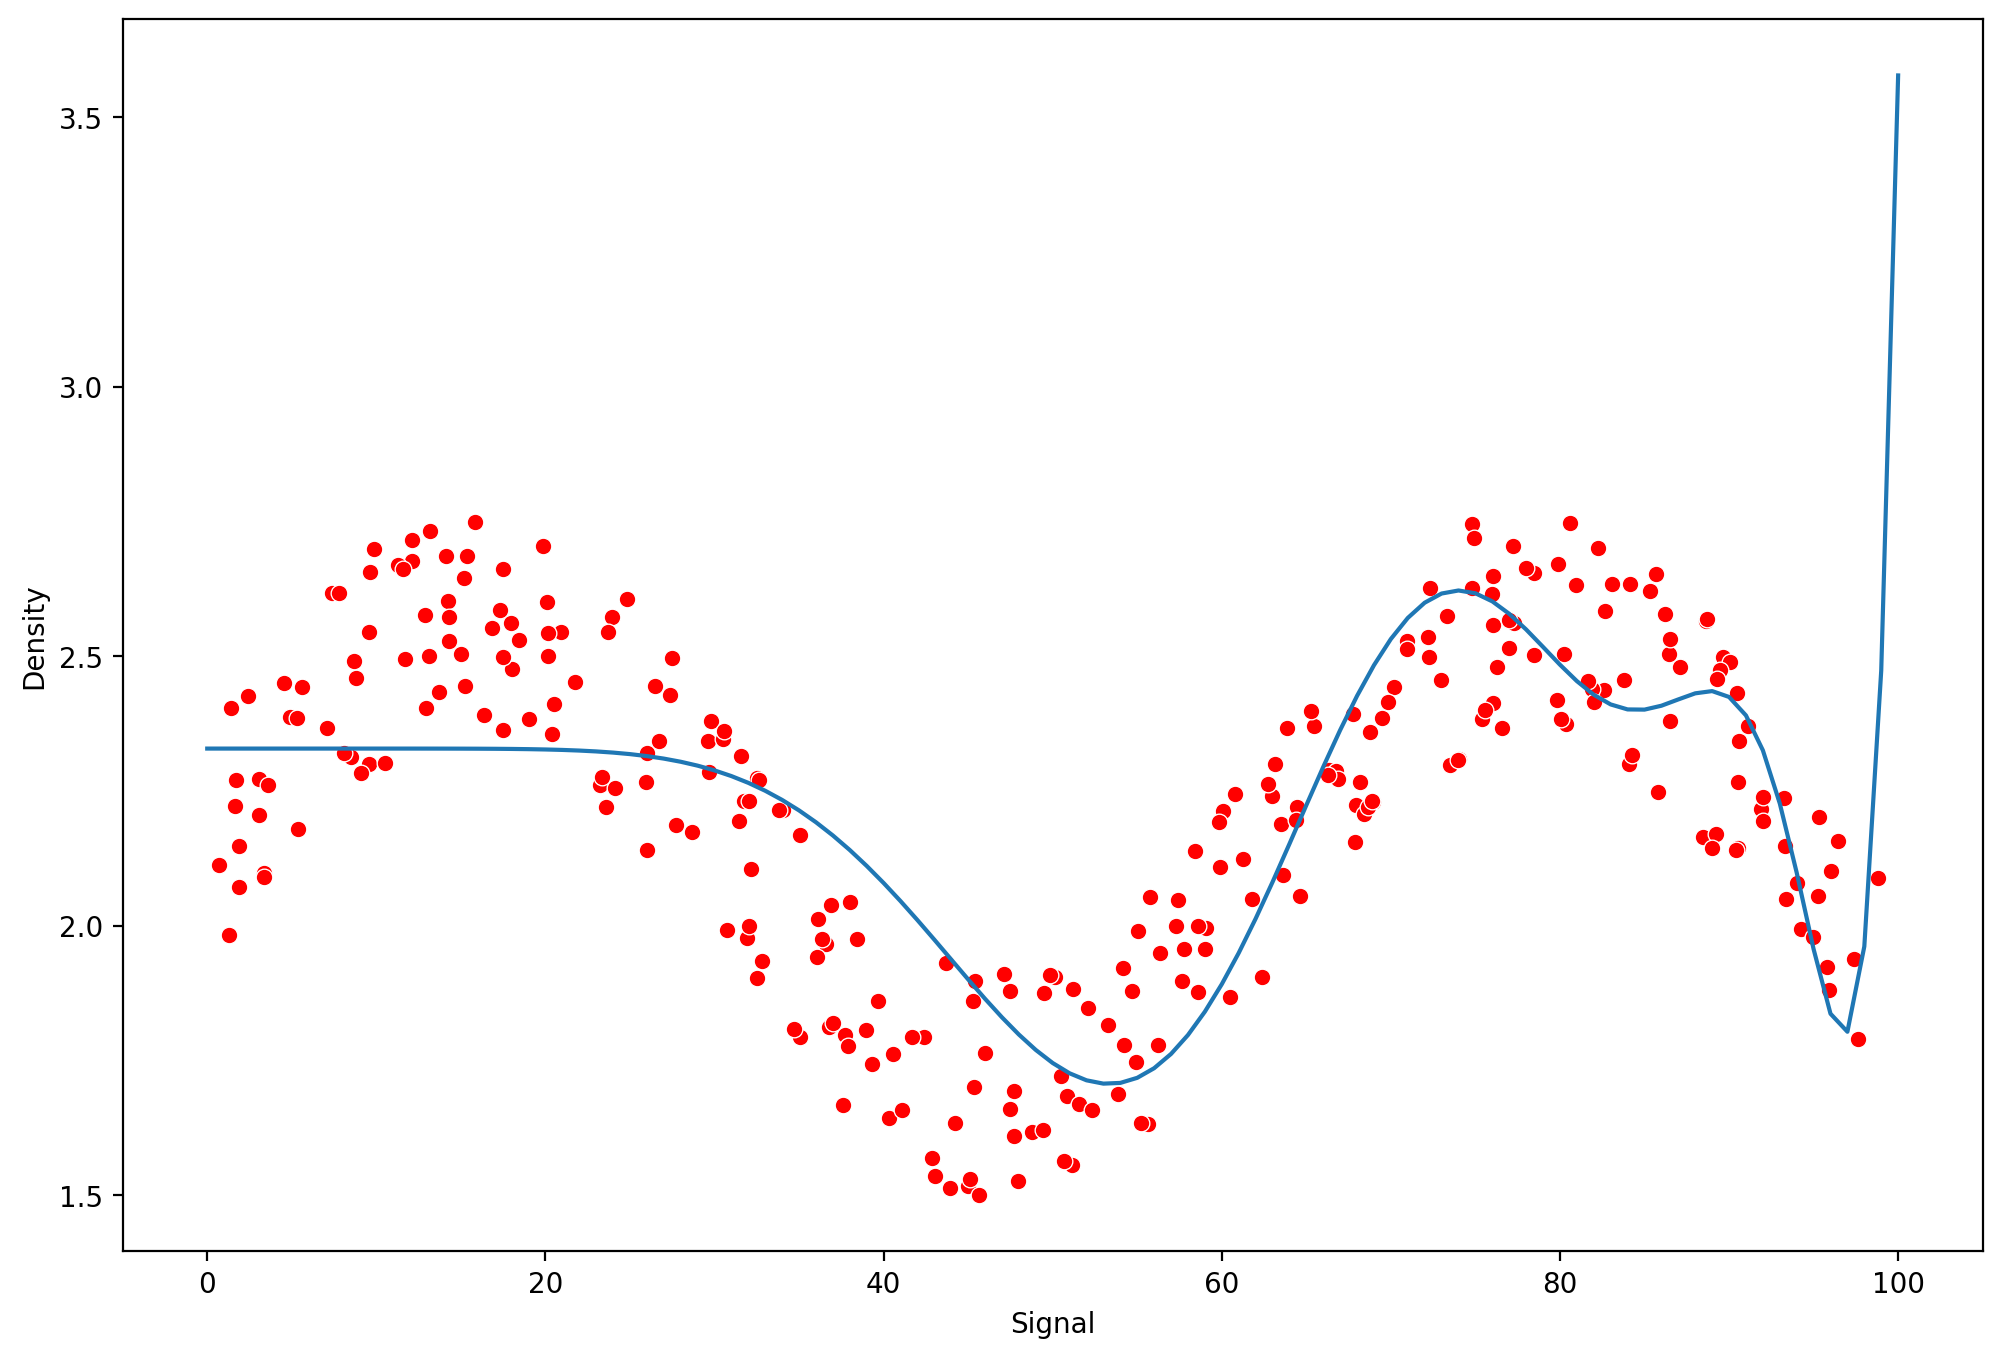

In [95]:
pipe =make_pipeline(PolynomialFeatures(degree=15),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

MAE:0.2068878650798262
MSE:0.06435545877348584


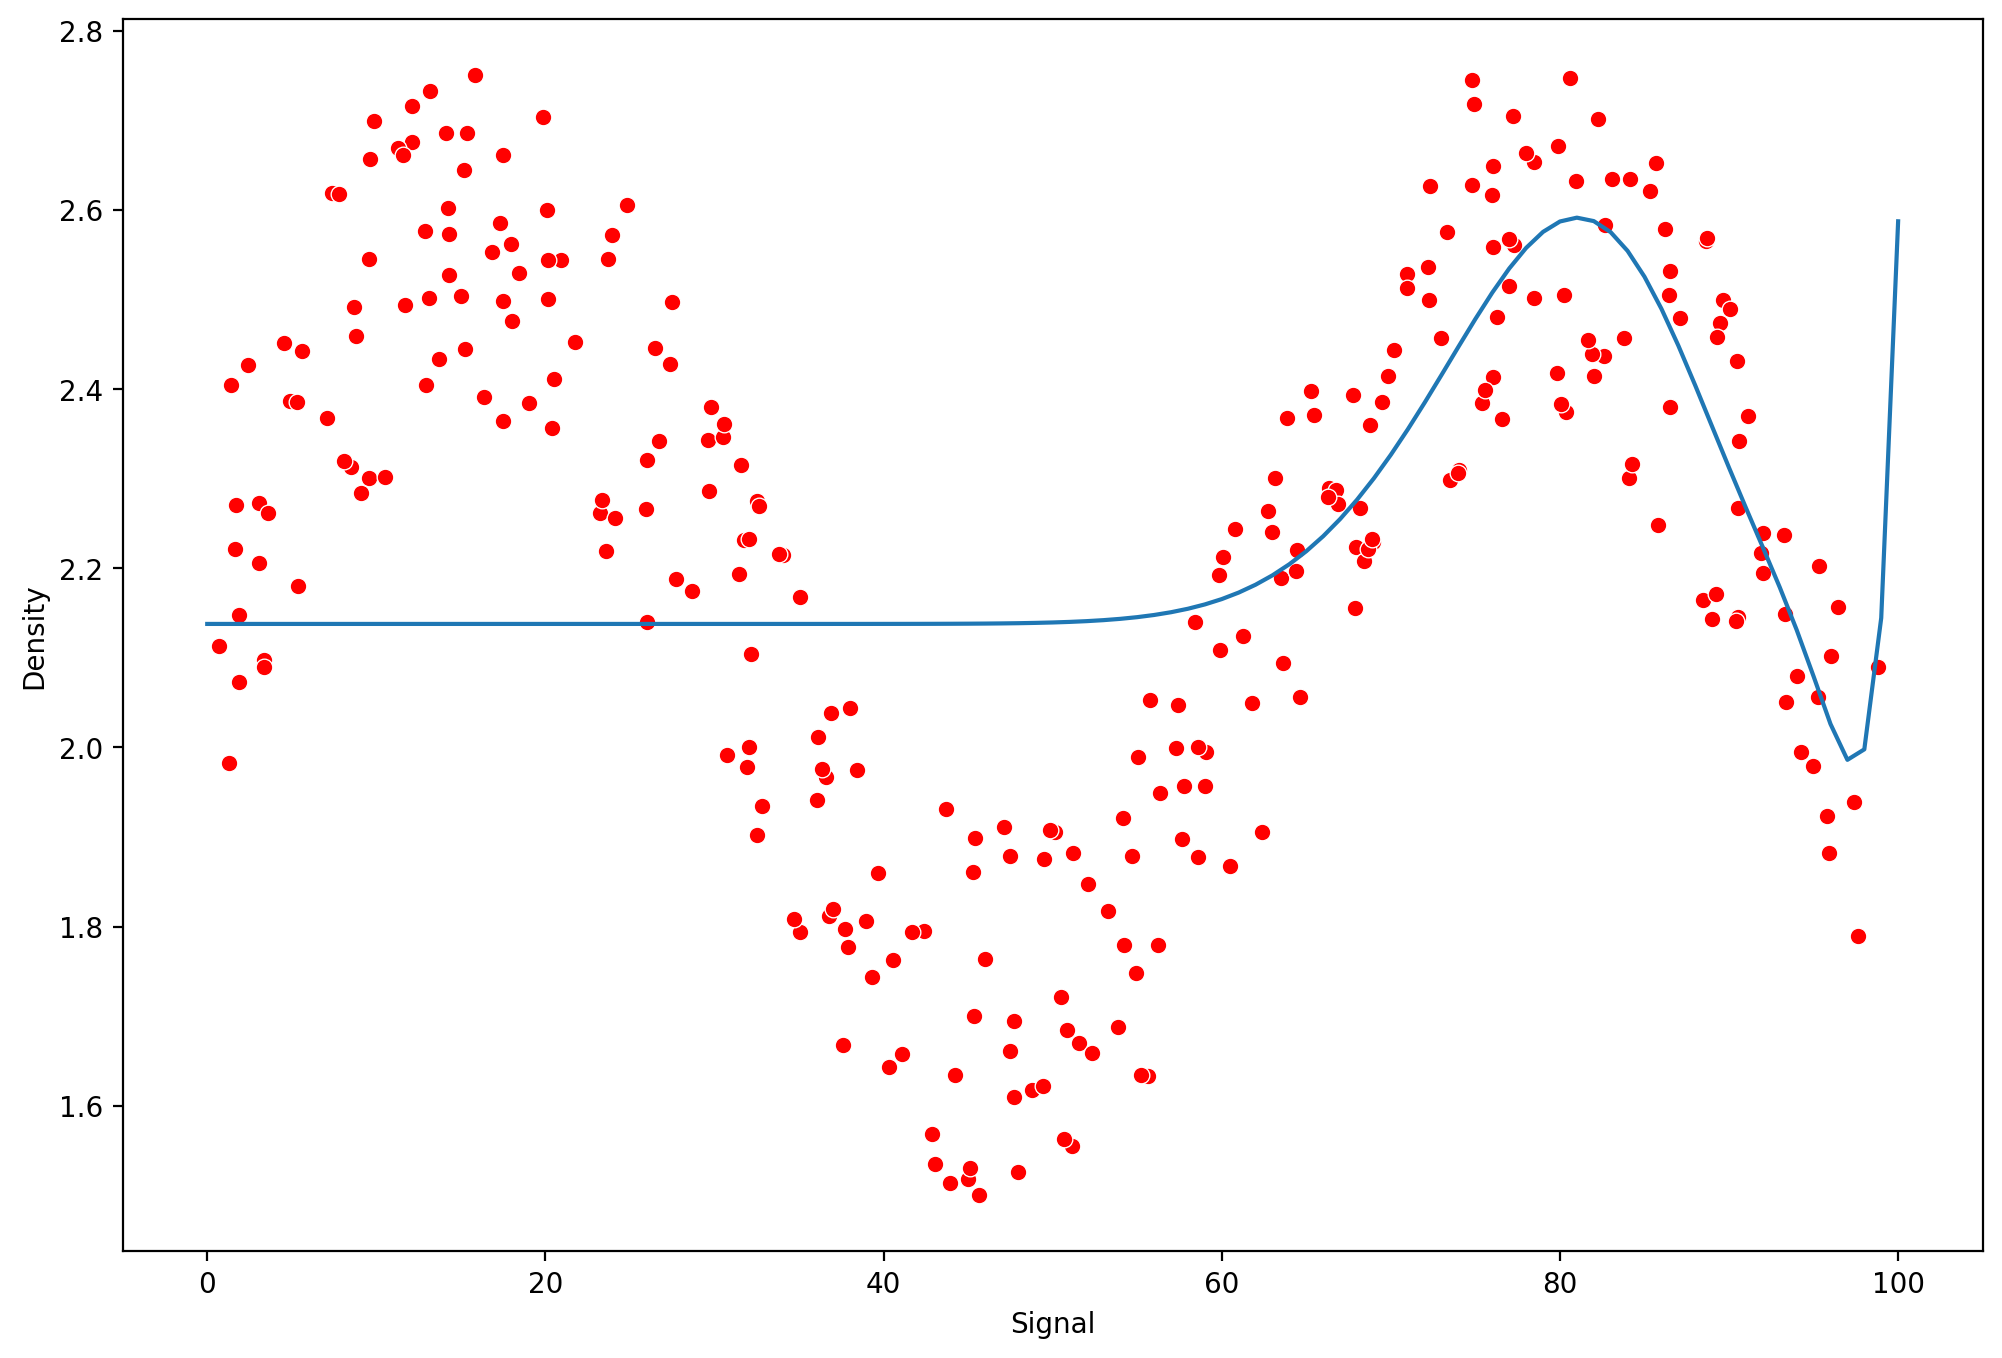

In [96]:
pipe =make_pipeline(PolynomialFeatures(degree=25),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

In [97]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.12817936228823248
MSE:0.026093708593670373
MAE:0.11823219946159098
MSE:0.019604651558441457
MAE:0.12059189553582521
MSE:0.01982606890649263
MAE:0.12023927871185225
MSE:0.019676531354108583


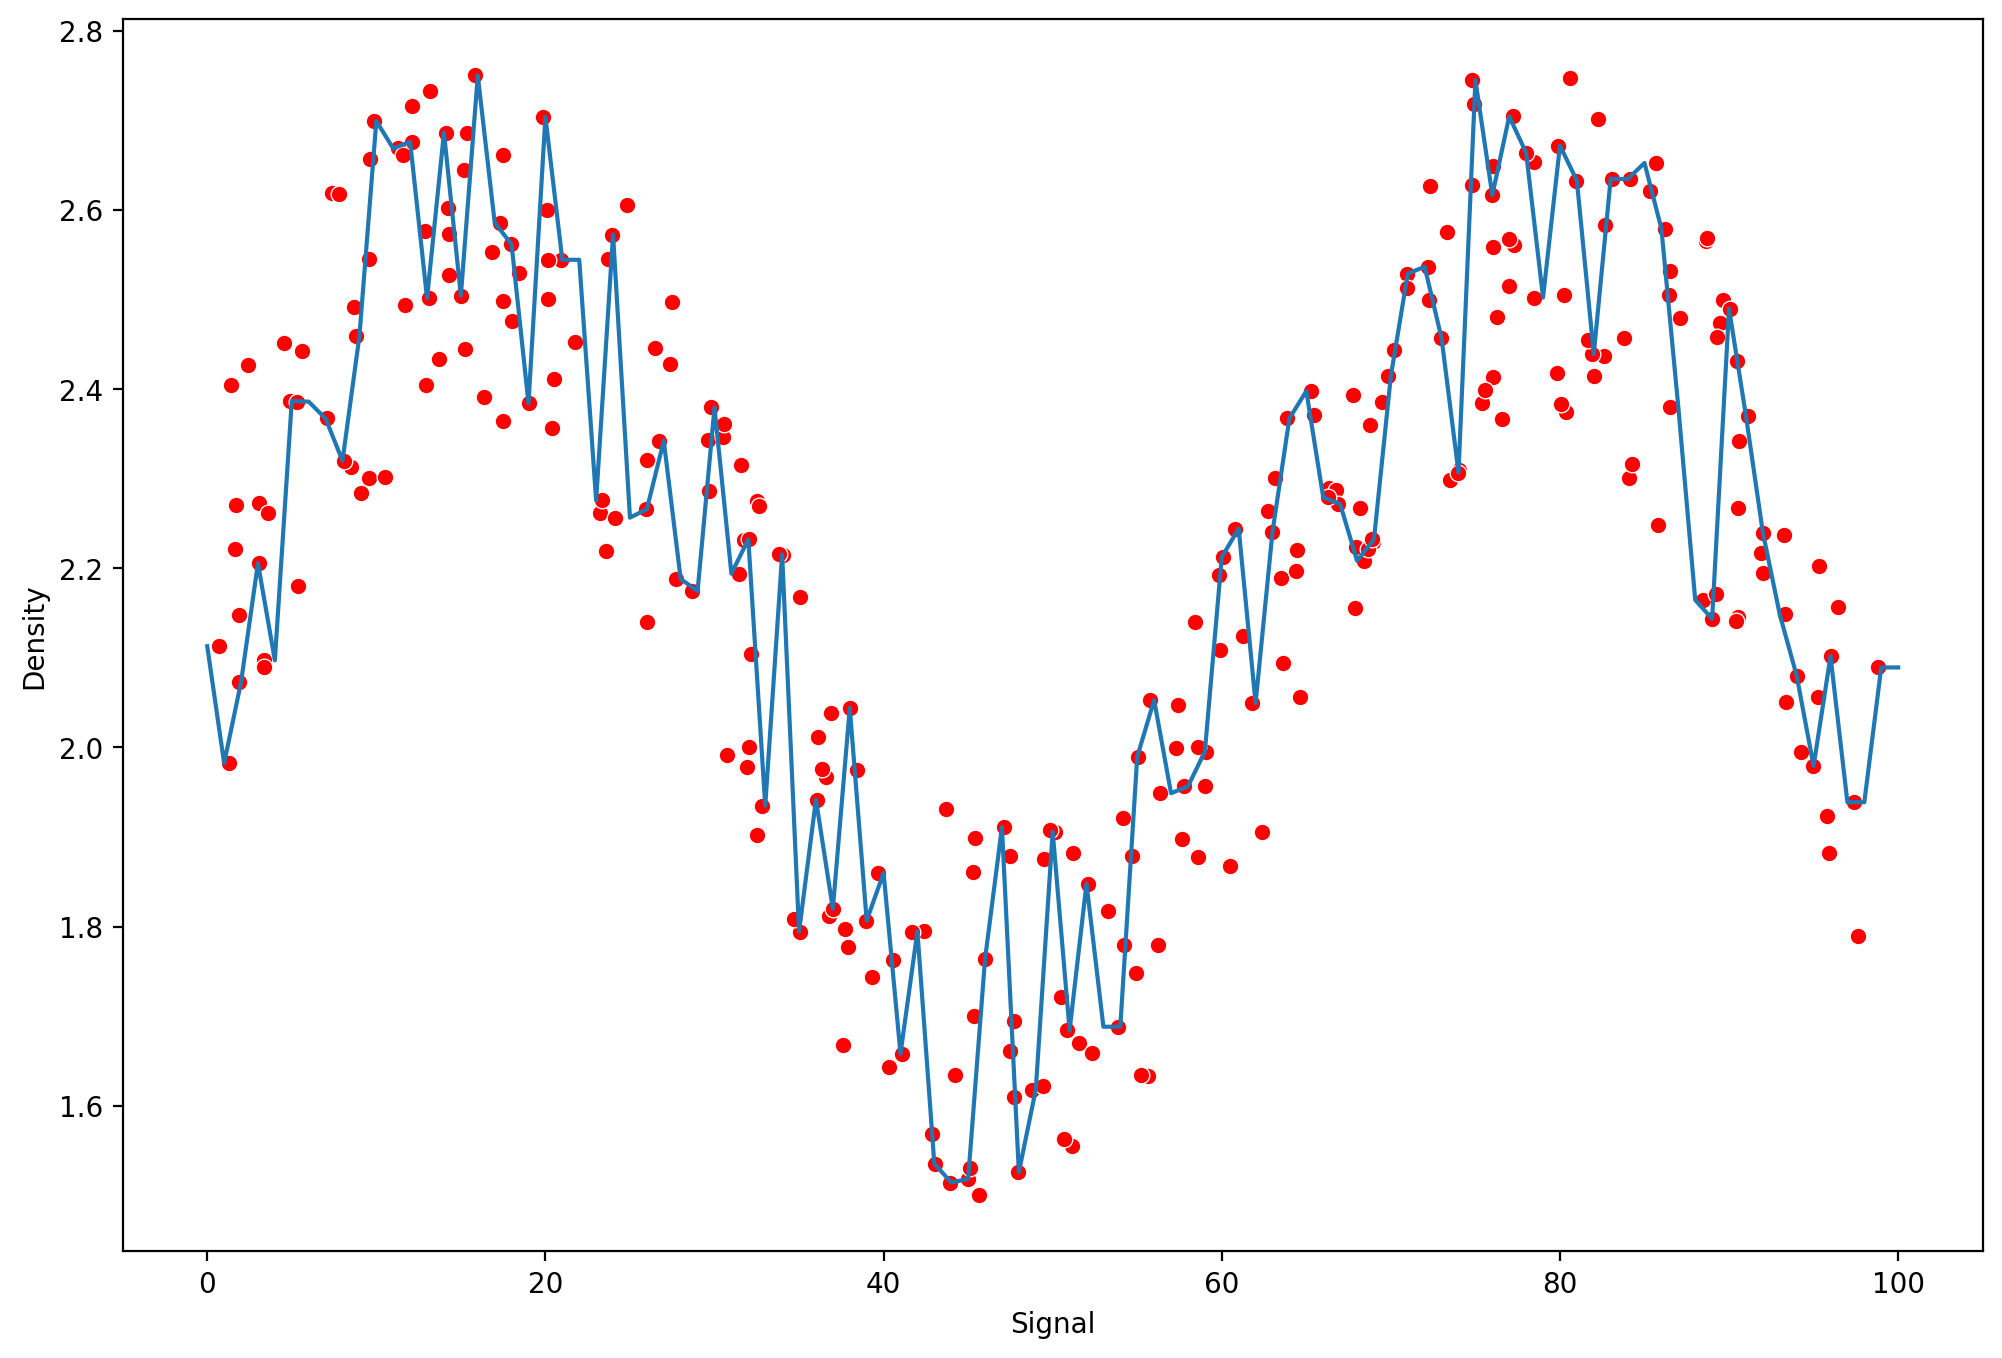

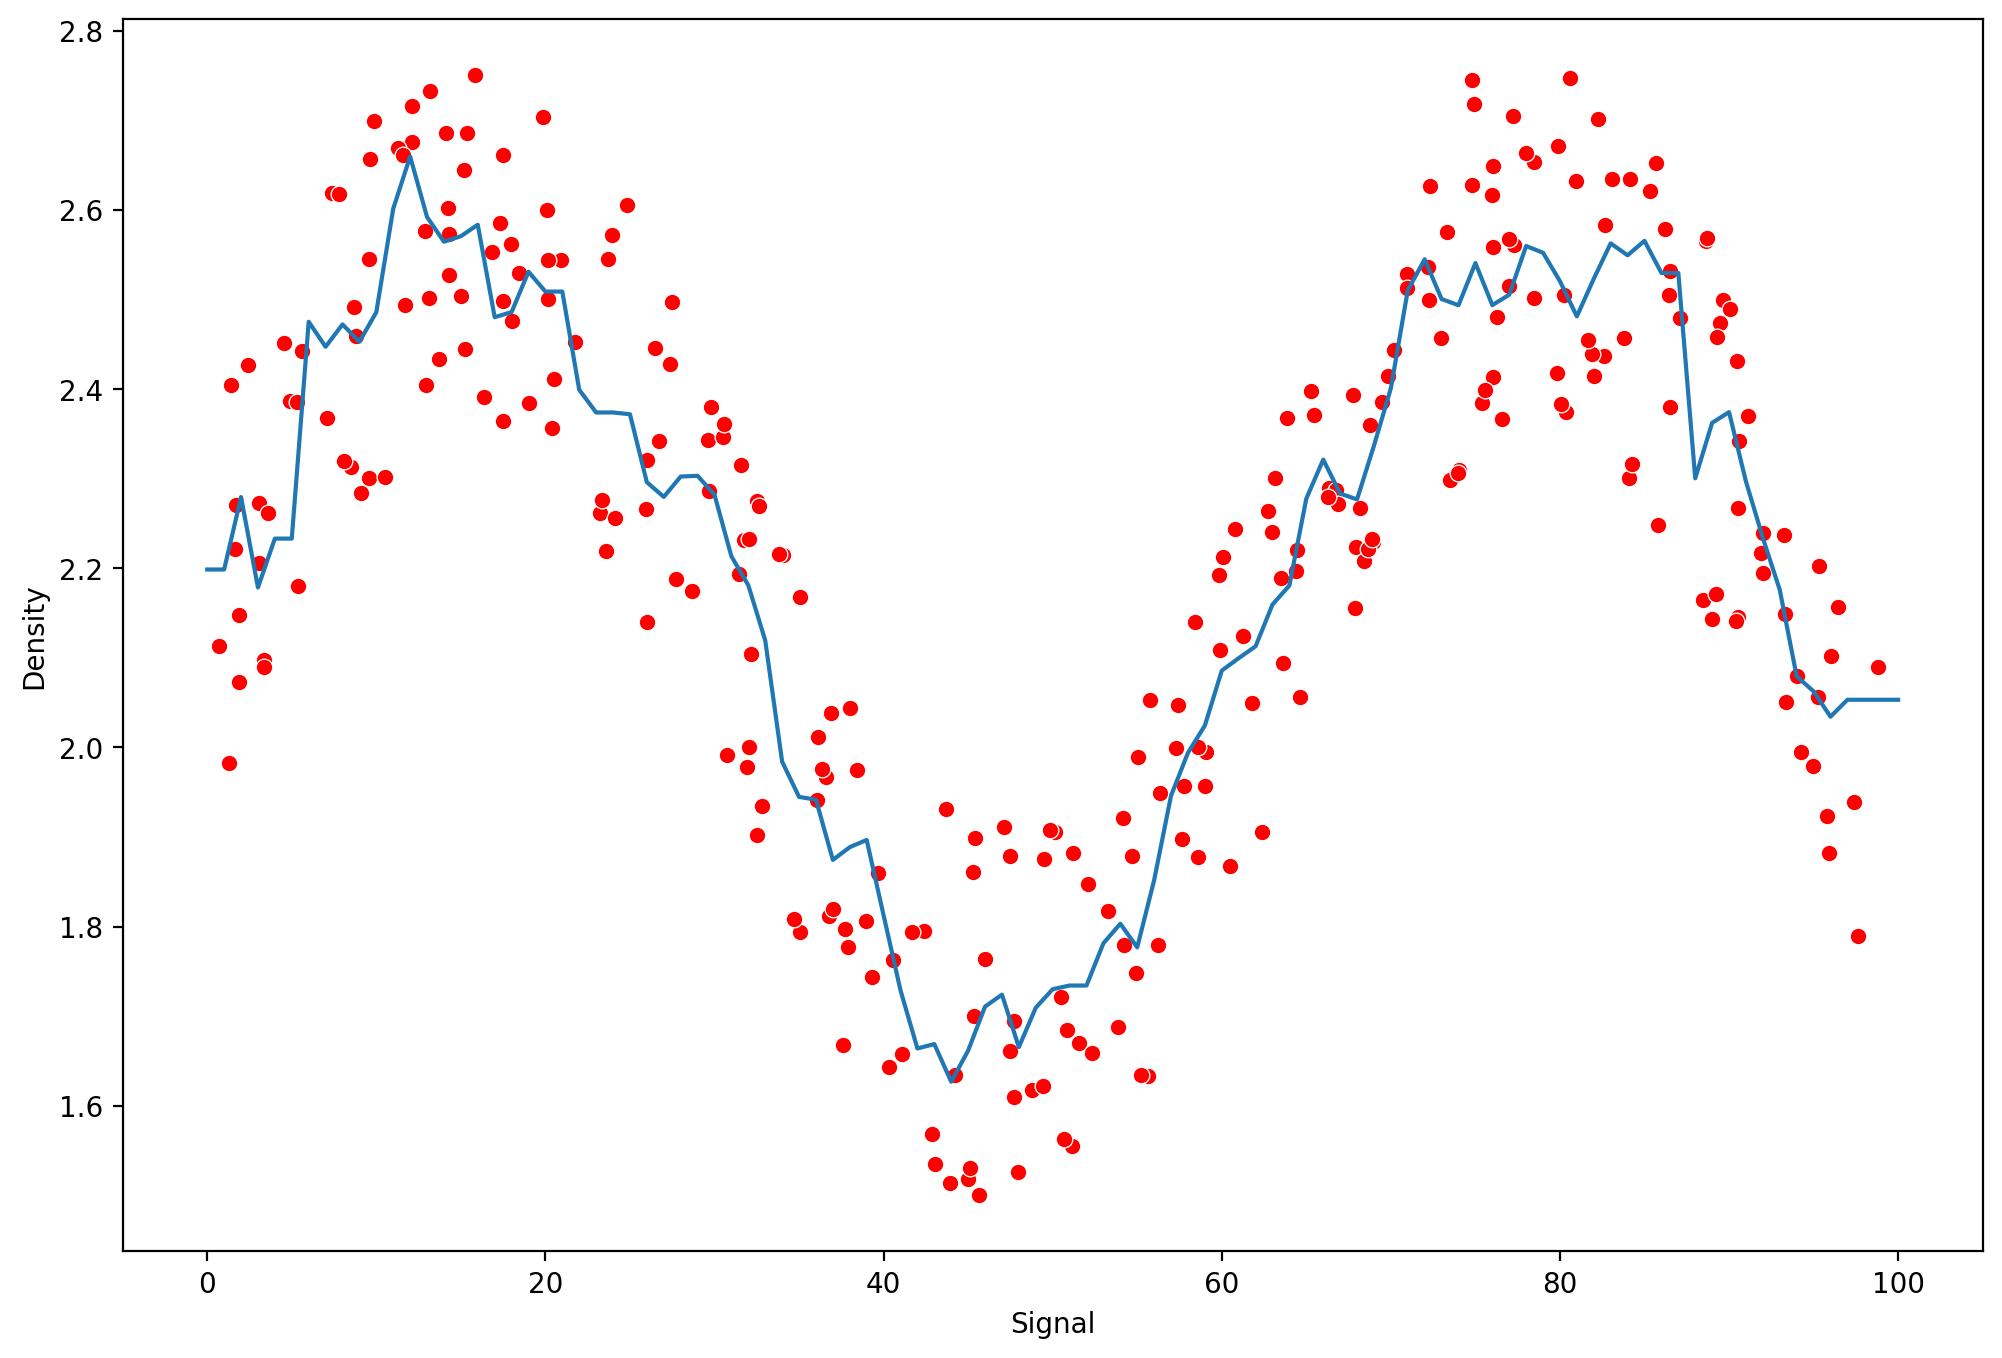

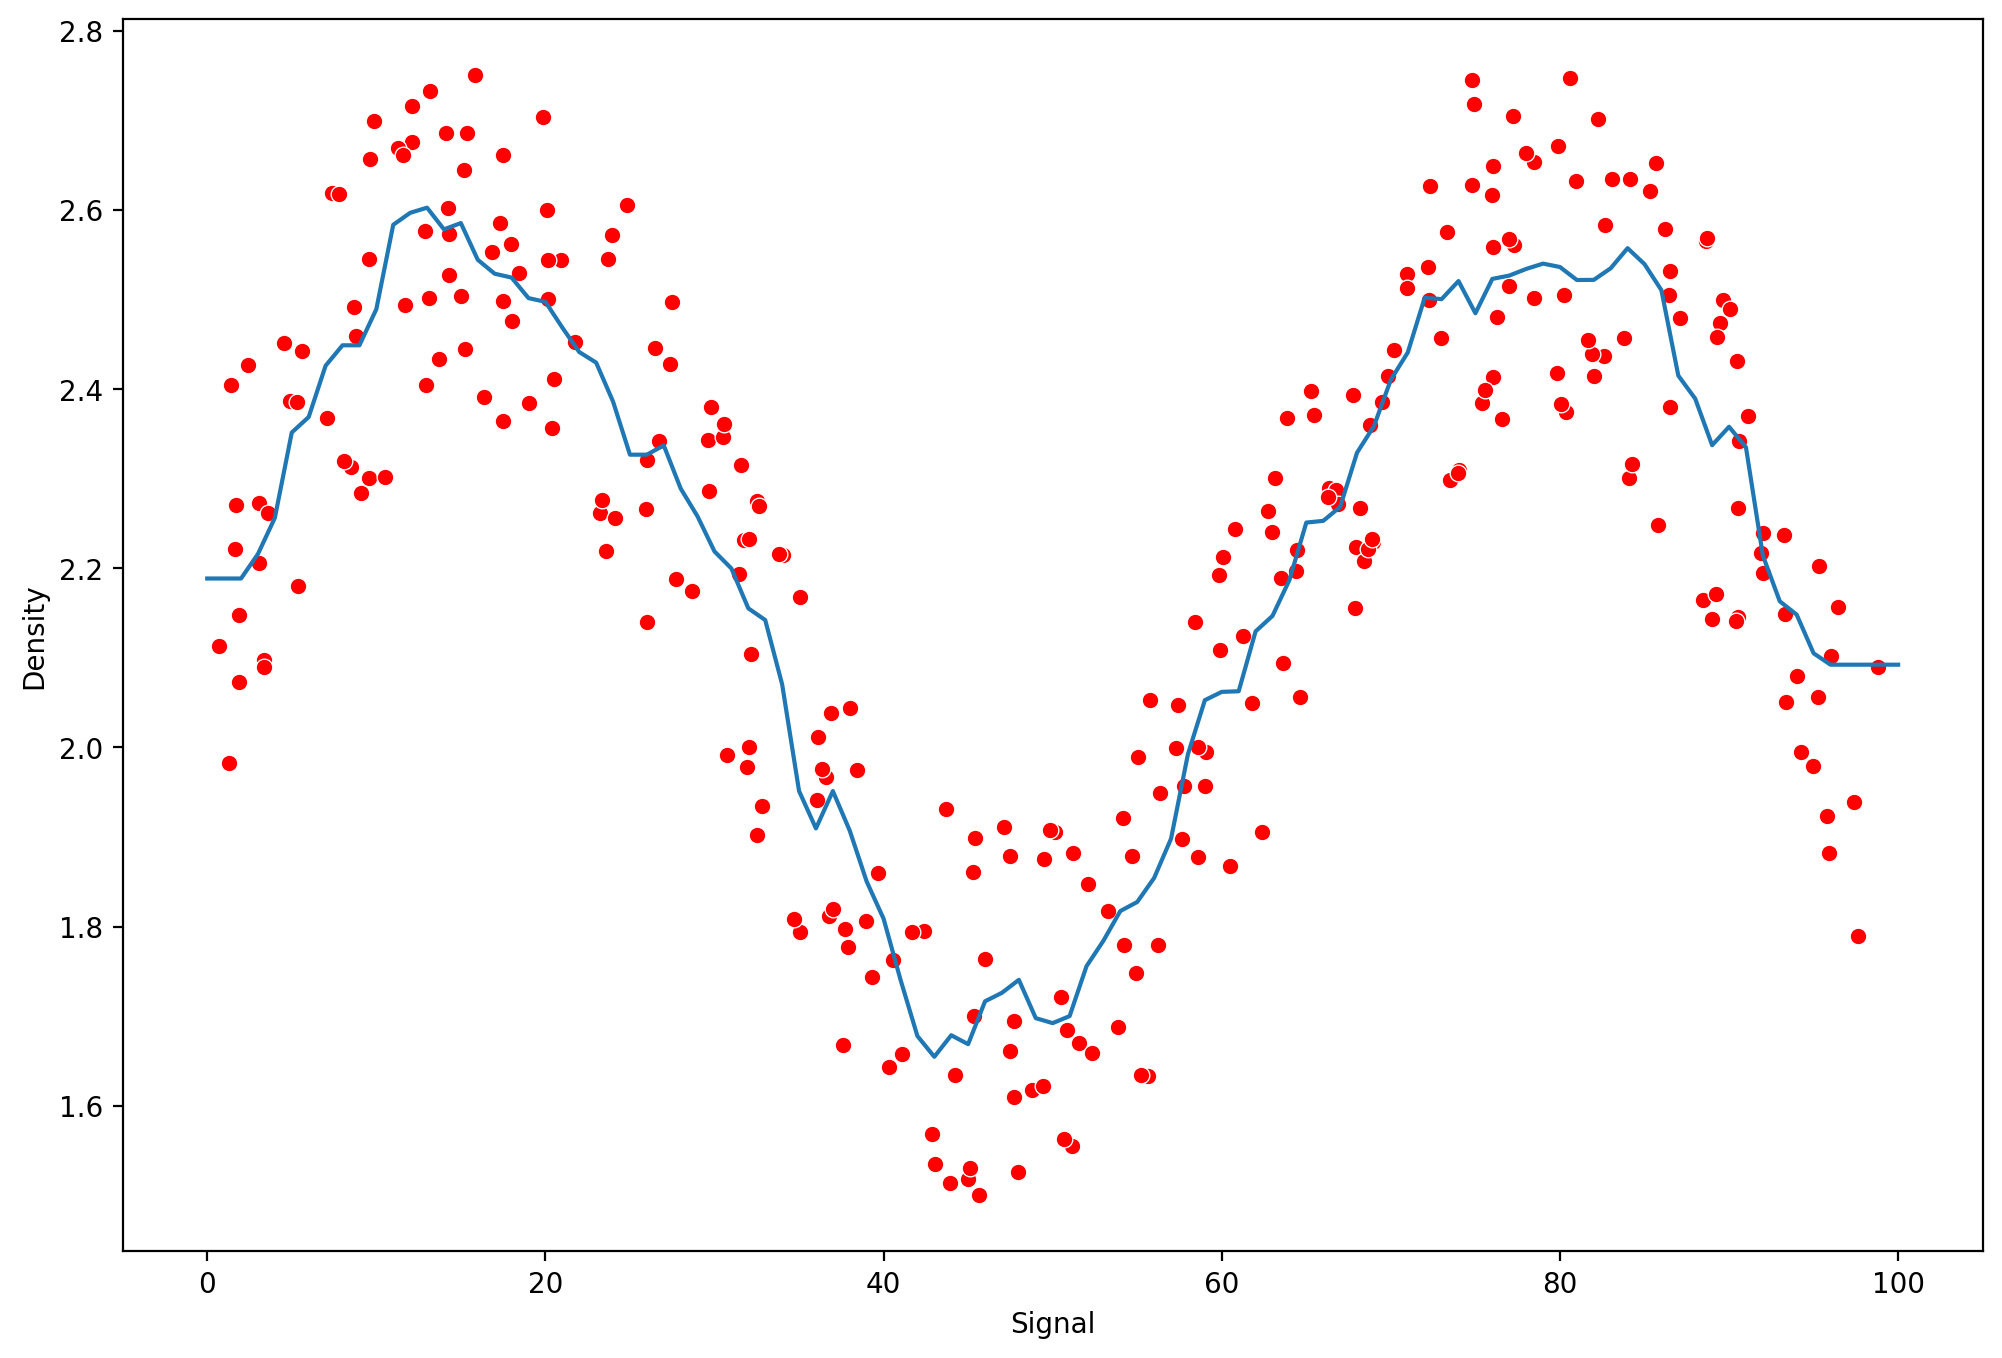

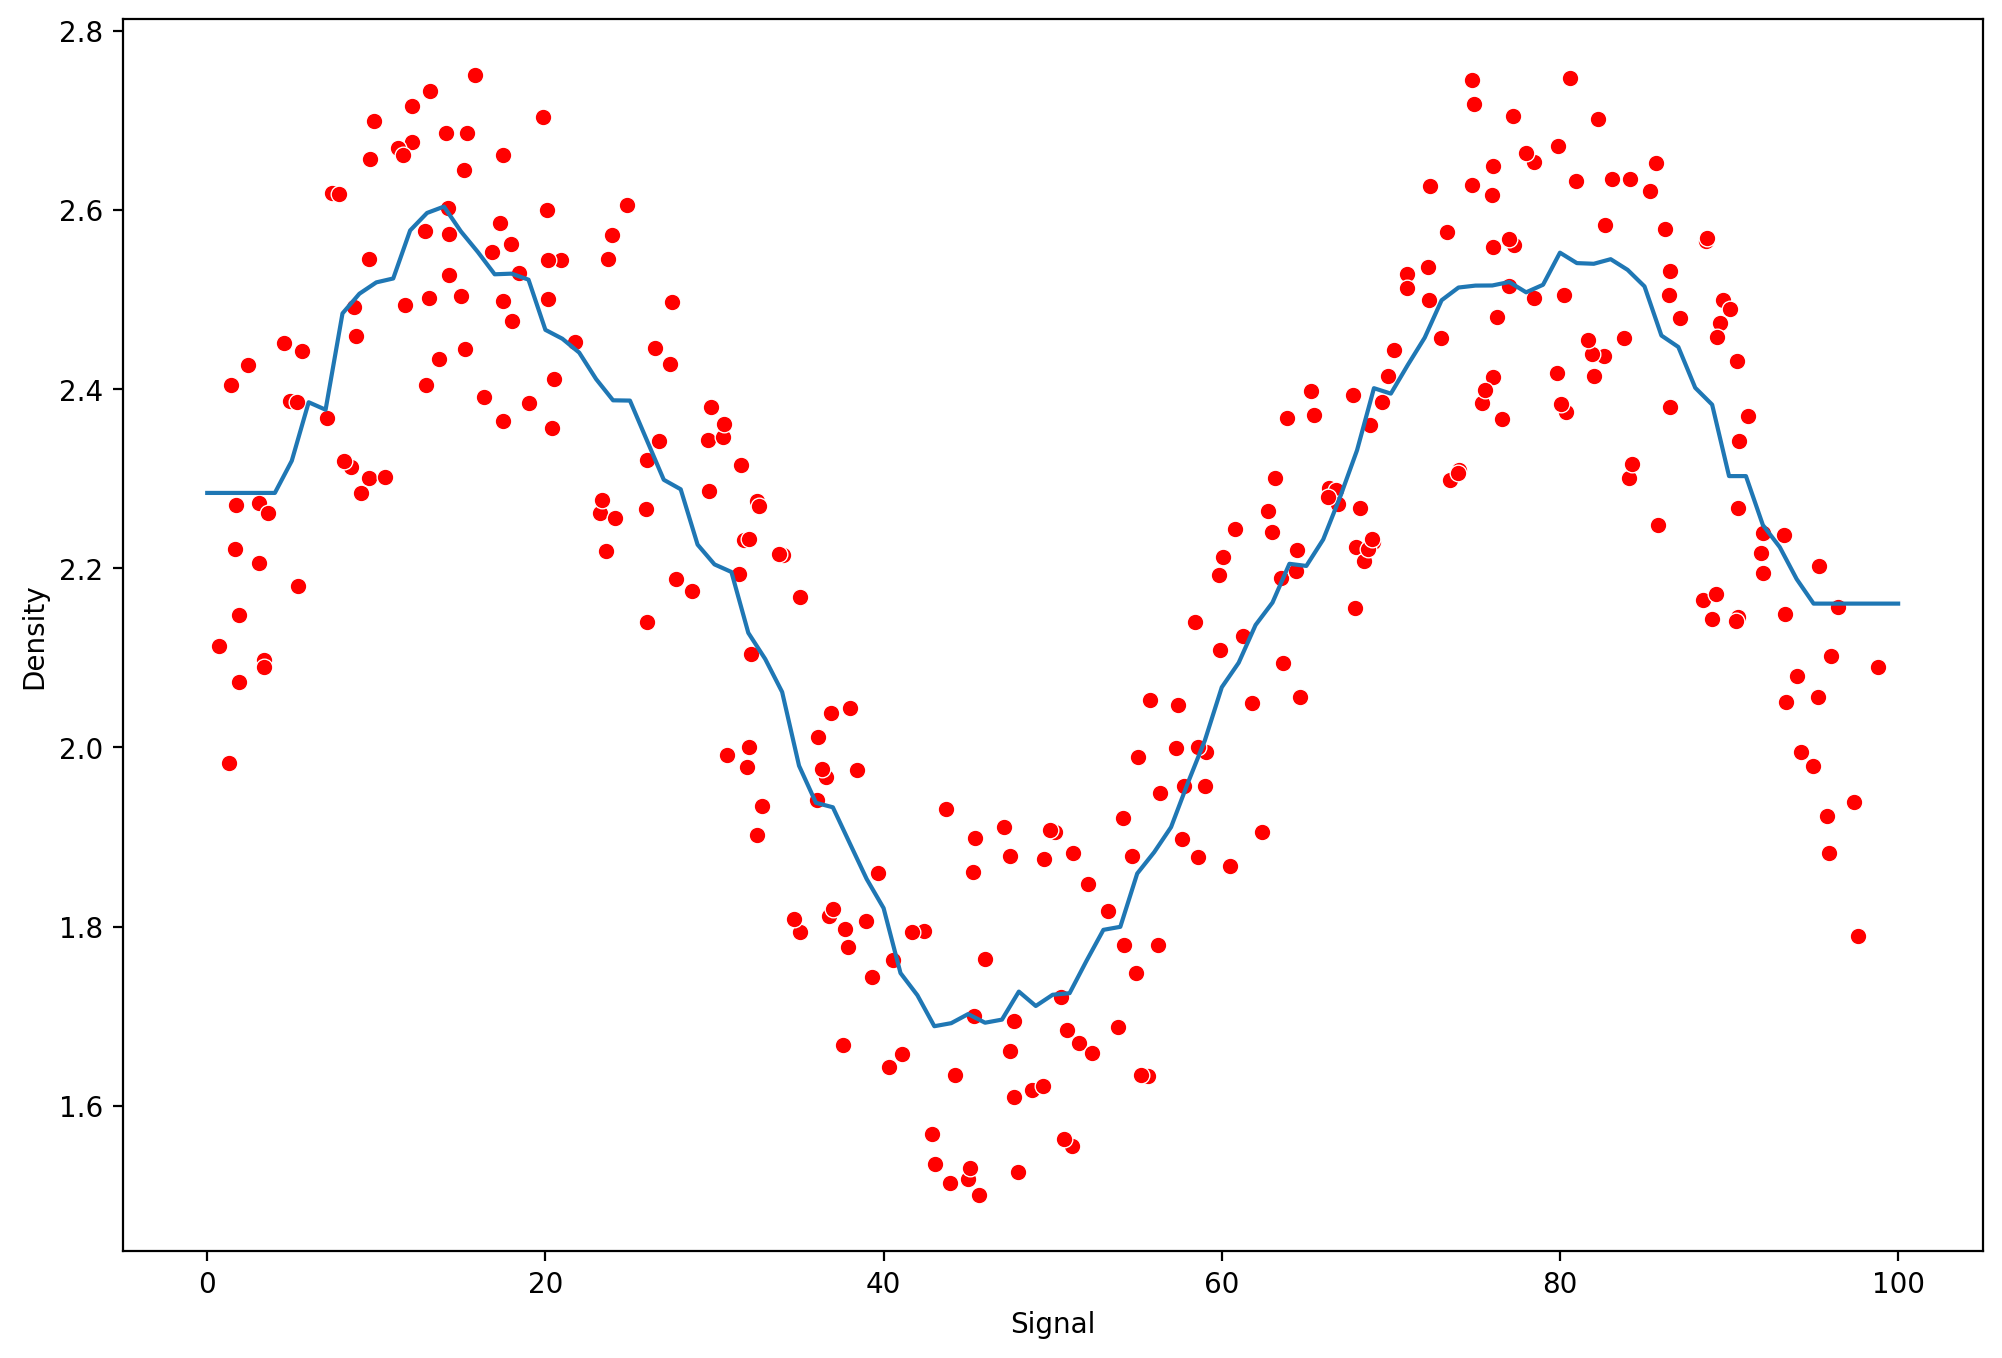

In [98]:
k_values =[1,5,10,15]
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model,X_train,X_test,y_train,y_test)

In [99]:
from sklearn.tree import DecisionTreeRegressor

MAE:0.12817936228823248
MSE:0.026093708593670373


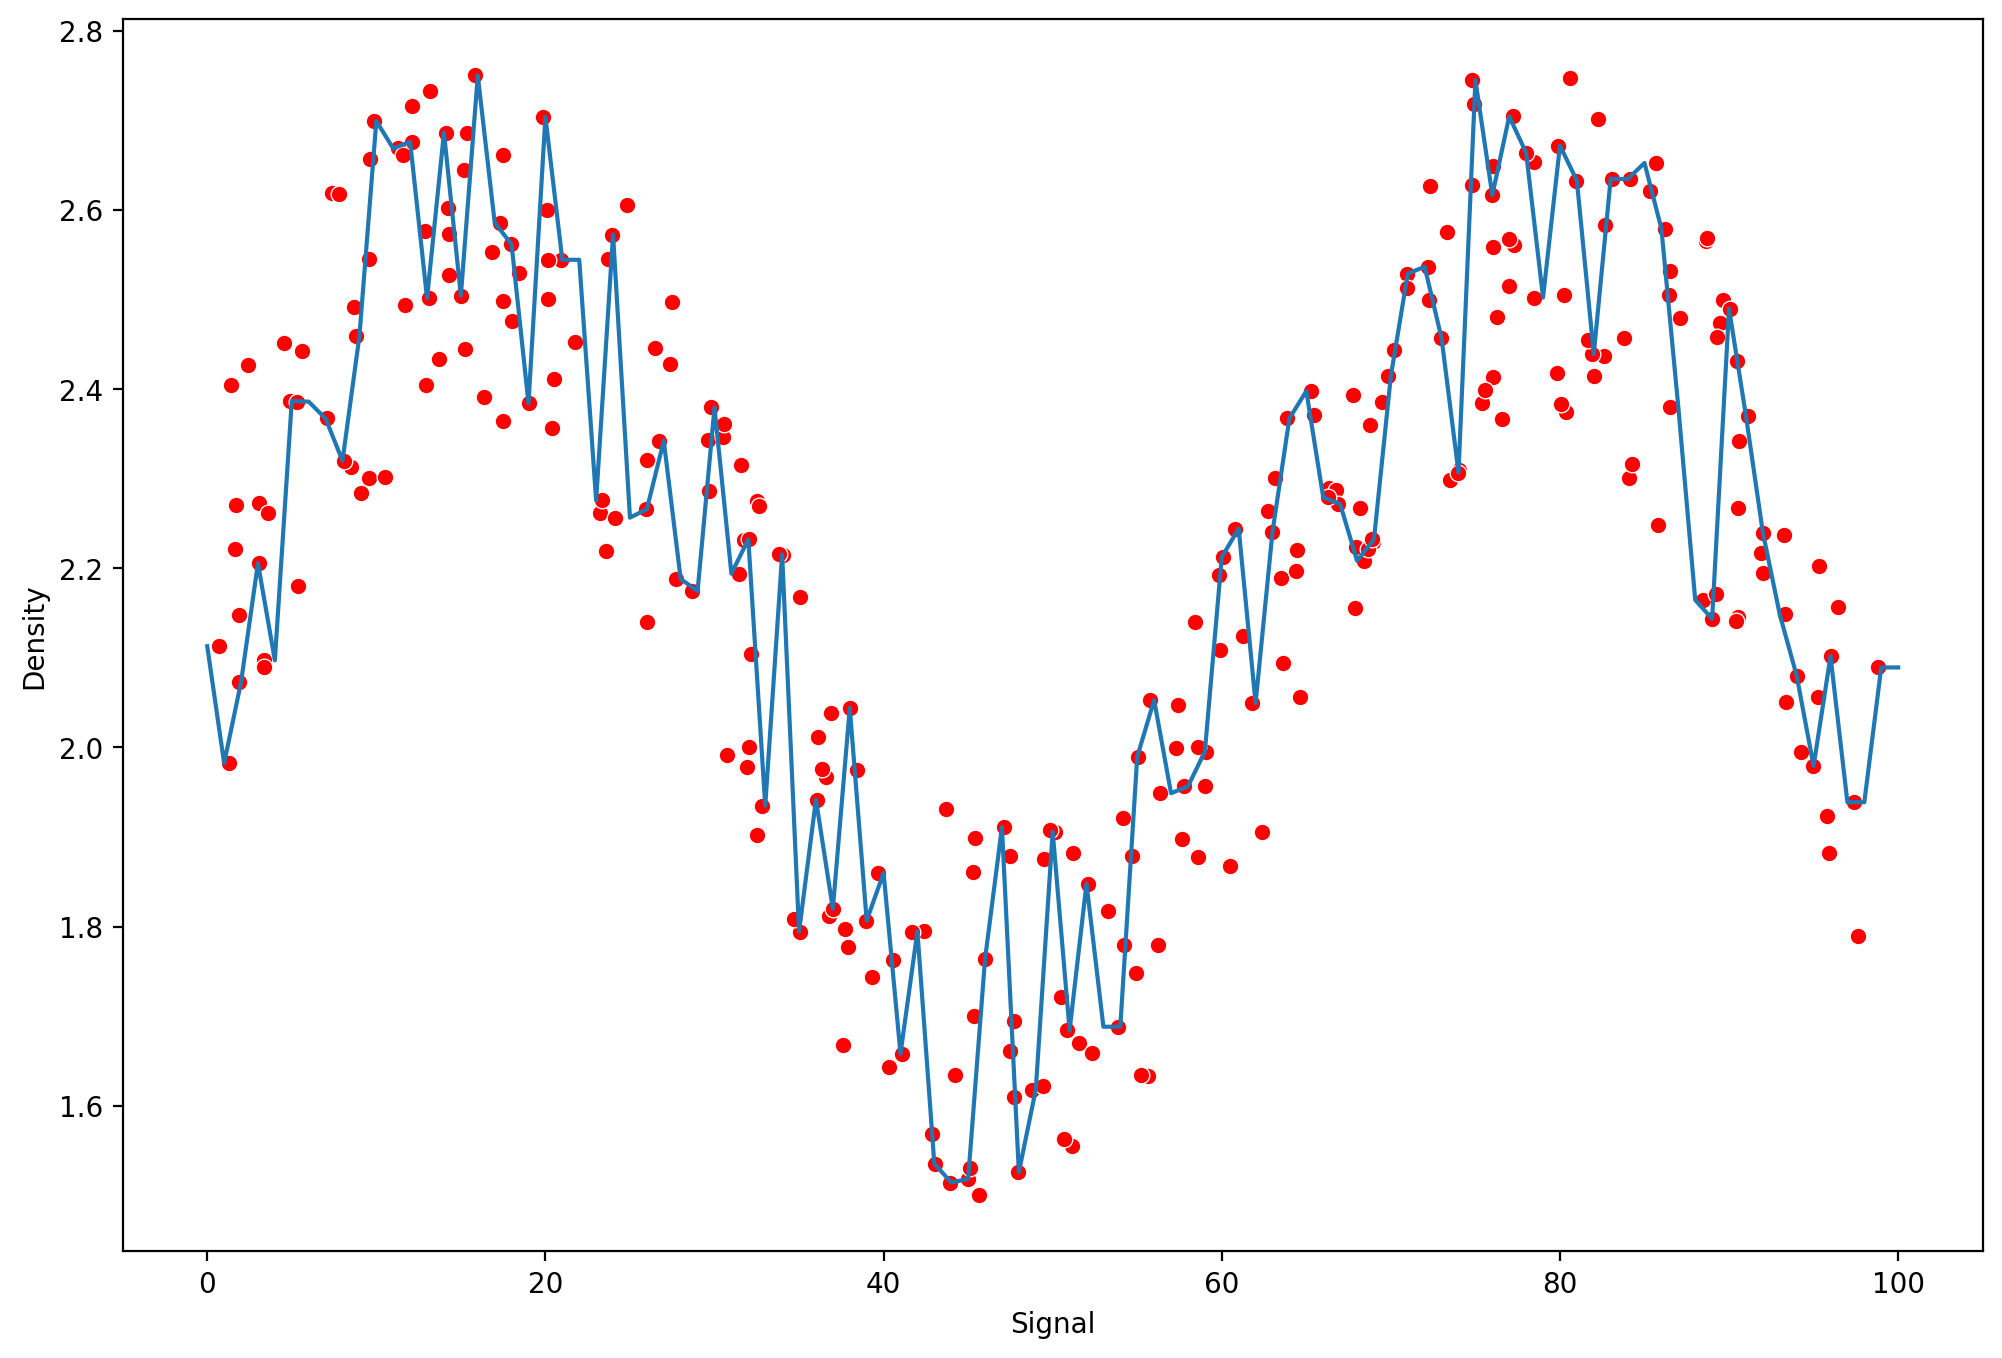

In [100]:
model = DecisionTreeRegressor()
run_model(model,X_train,X_test,y_train,y_test)

In [101]:
 from sklearn.svm import SVR

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
svr =SVR()
param_grid ={'C':[0.01,0.01,1,50,100,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)

MAE:0.11127327567318512
MSE:0.016911986810583892


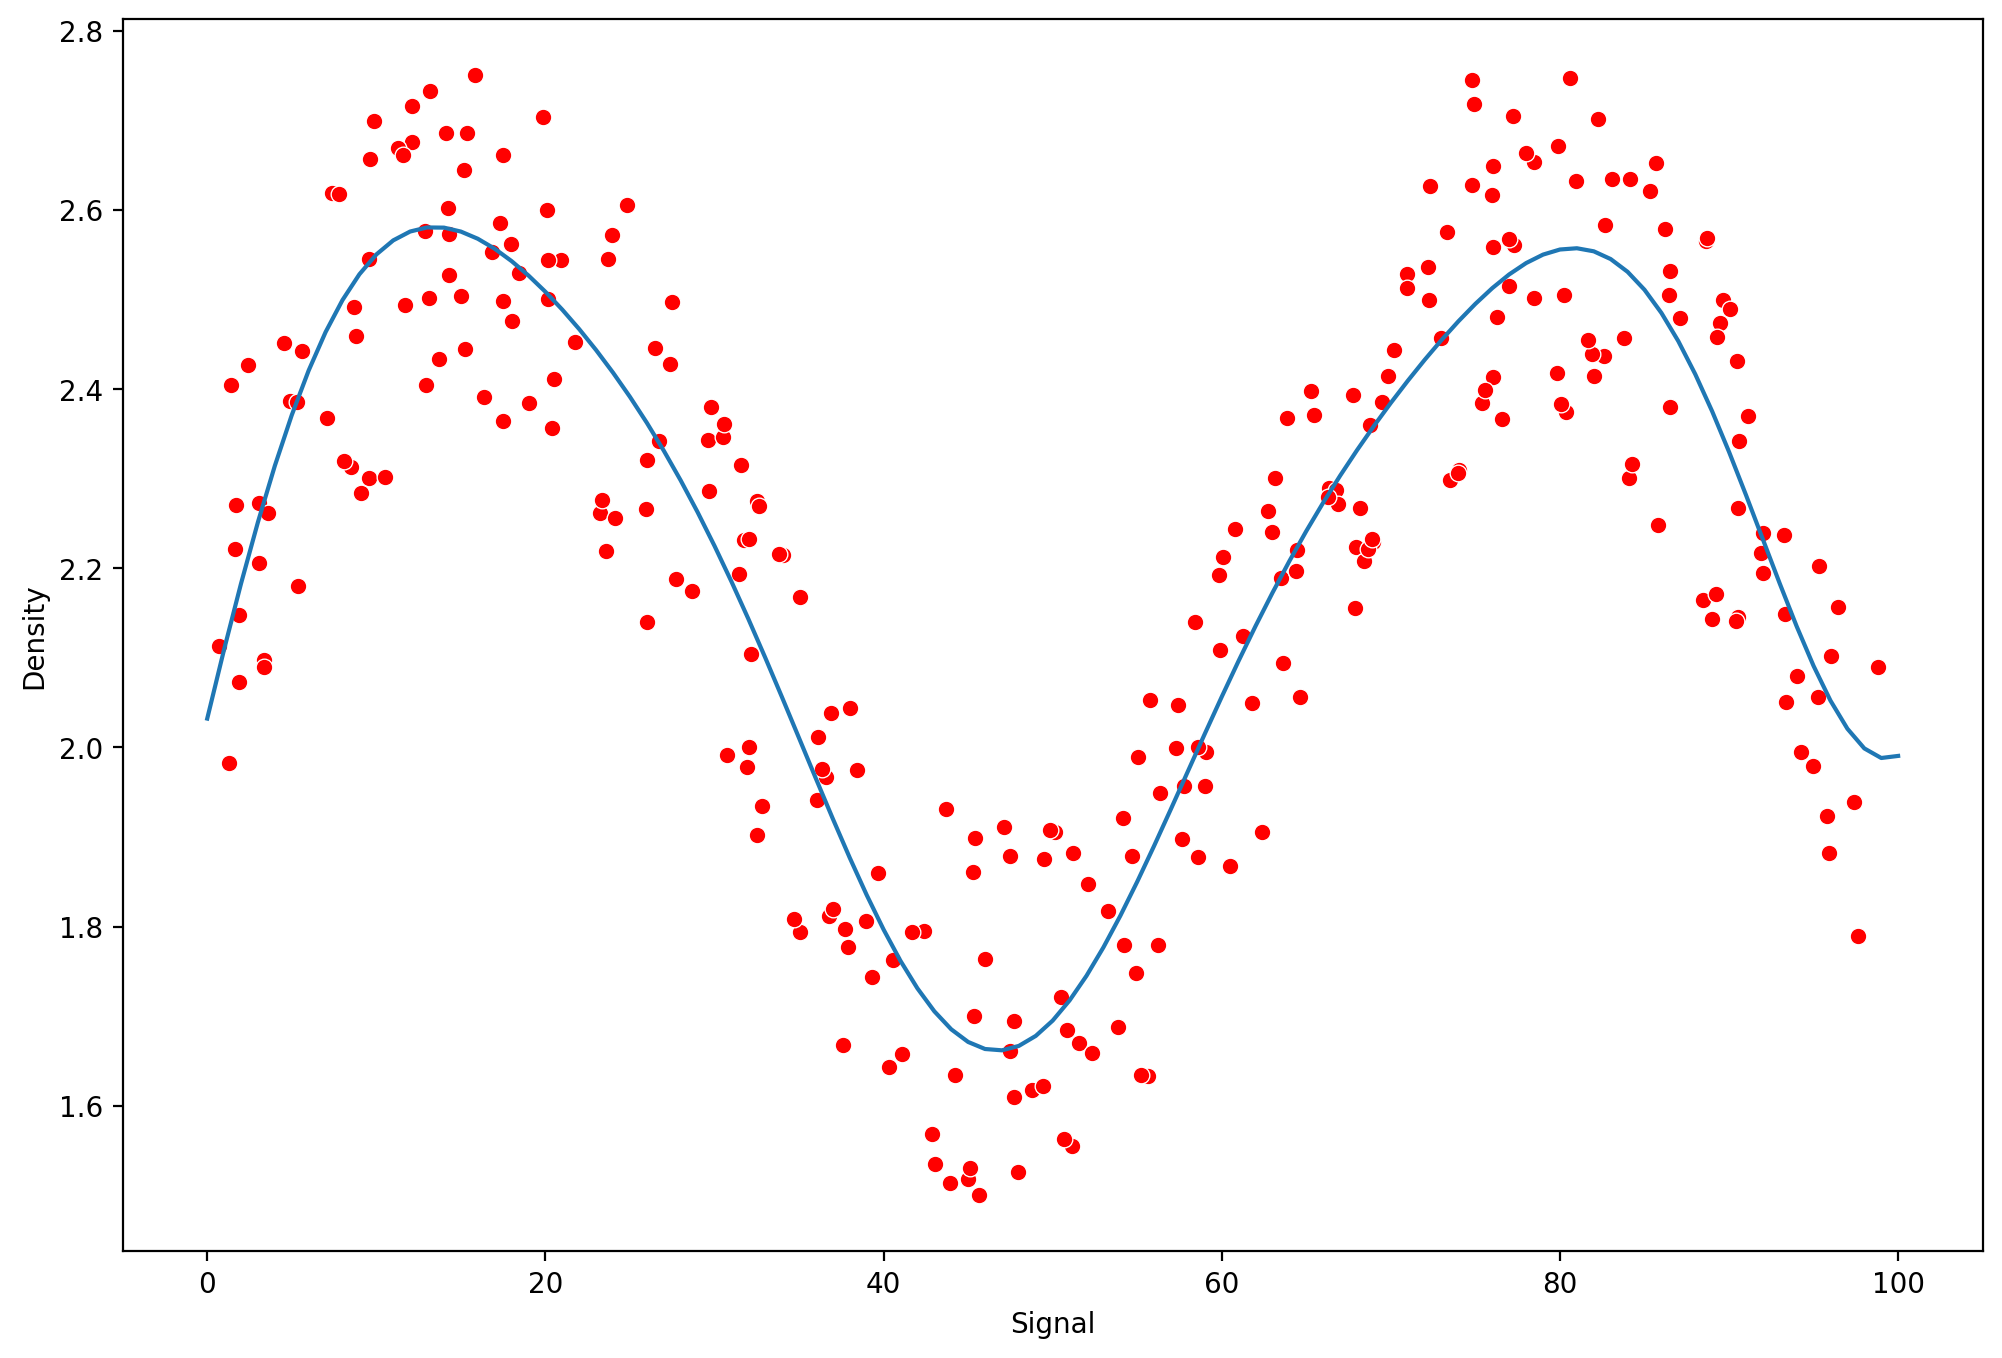

In [104]:
run_model(grid,X_train,X_test,y_train,y_test)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rfr = RandomForestRegressor(n_estimators=10)

MAE:0.1181952873189119
MSE:0.019808176422778864


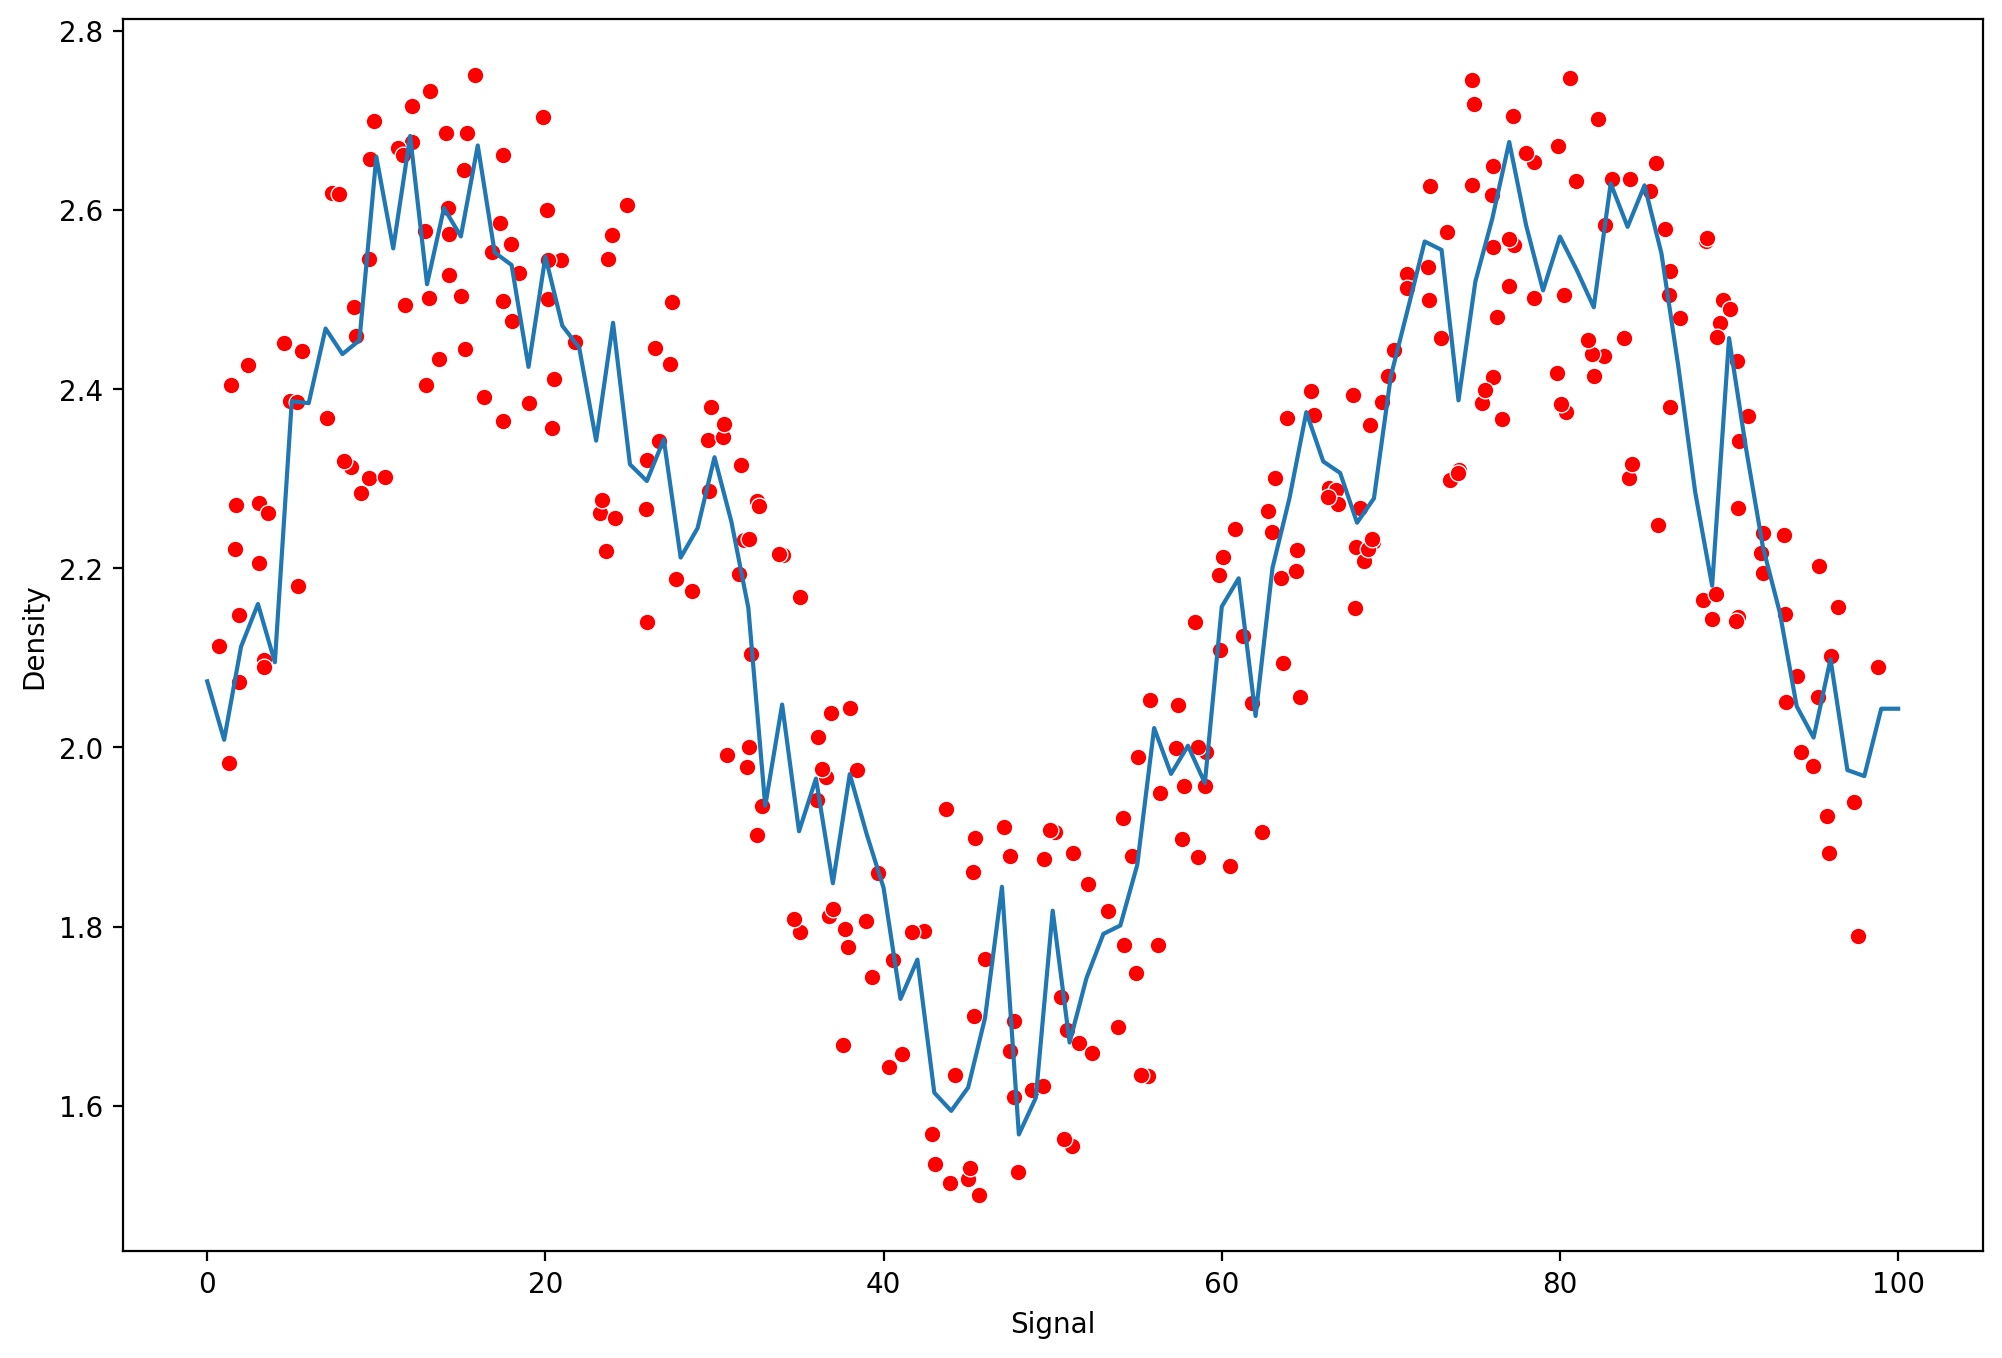

In [107]:
run_model(rfr,X_train,X_test,y_train,y_test)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE:0.11184318220220522
MSE:0.017786933928314482


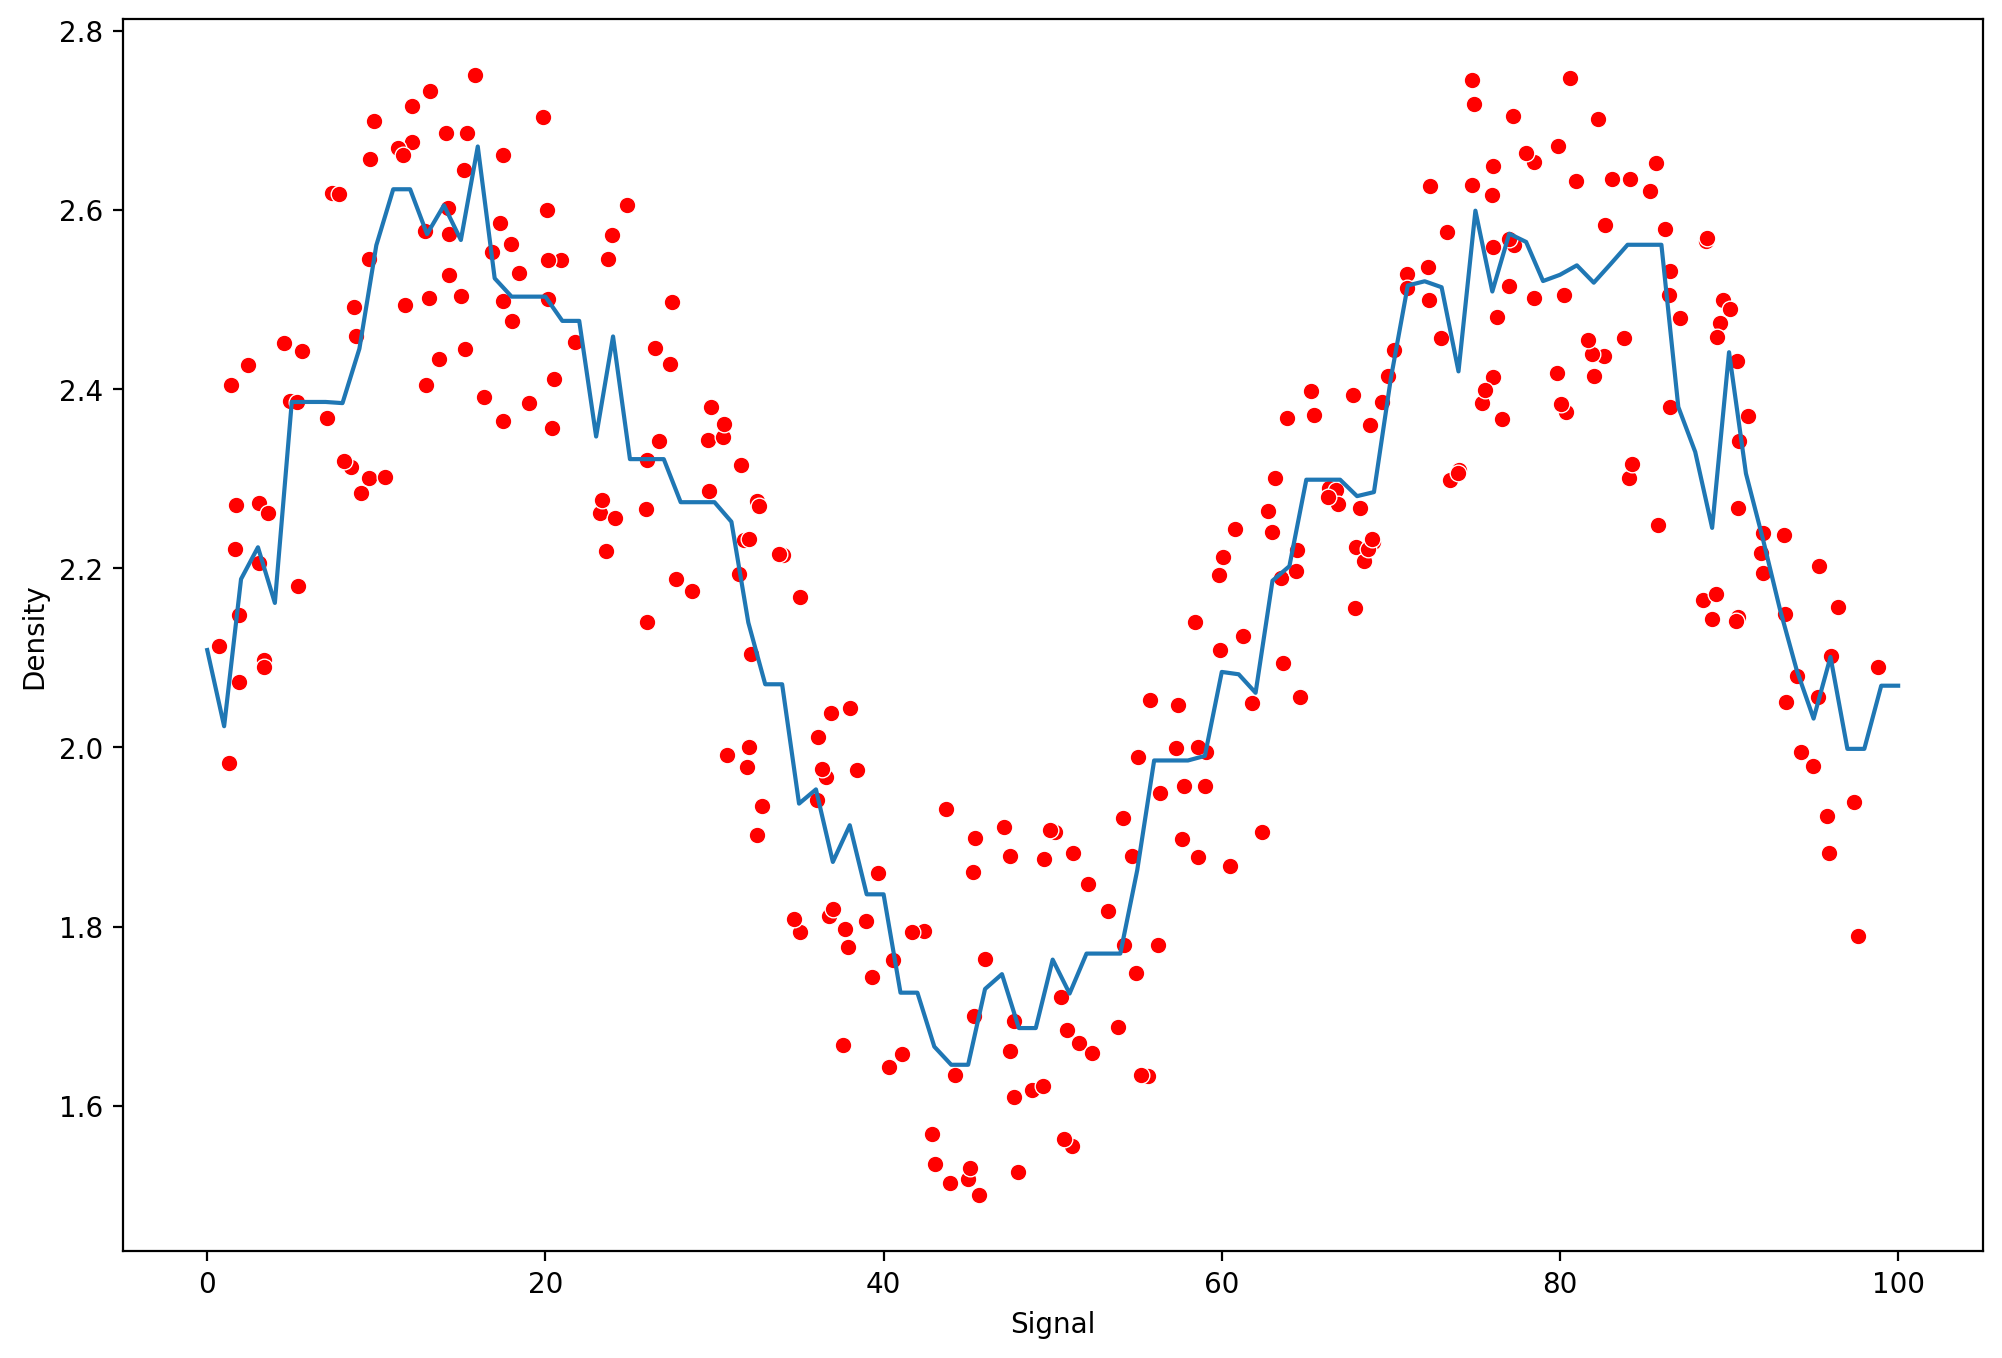

In [109]:
model =GradientBoostingRegressor()
run_model(model,X_train,X_test,y_train,y_test)

MAE:0.10950450145427683
MSE:0.016569031272775994


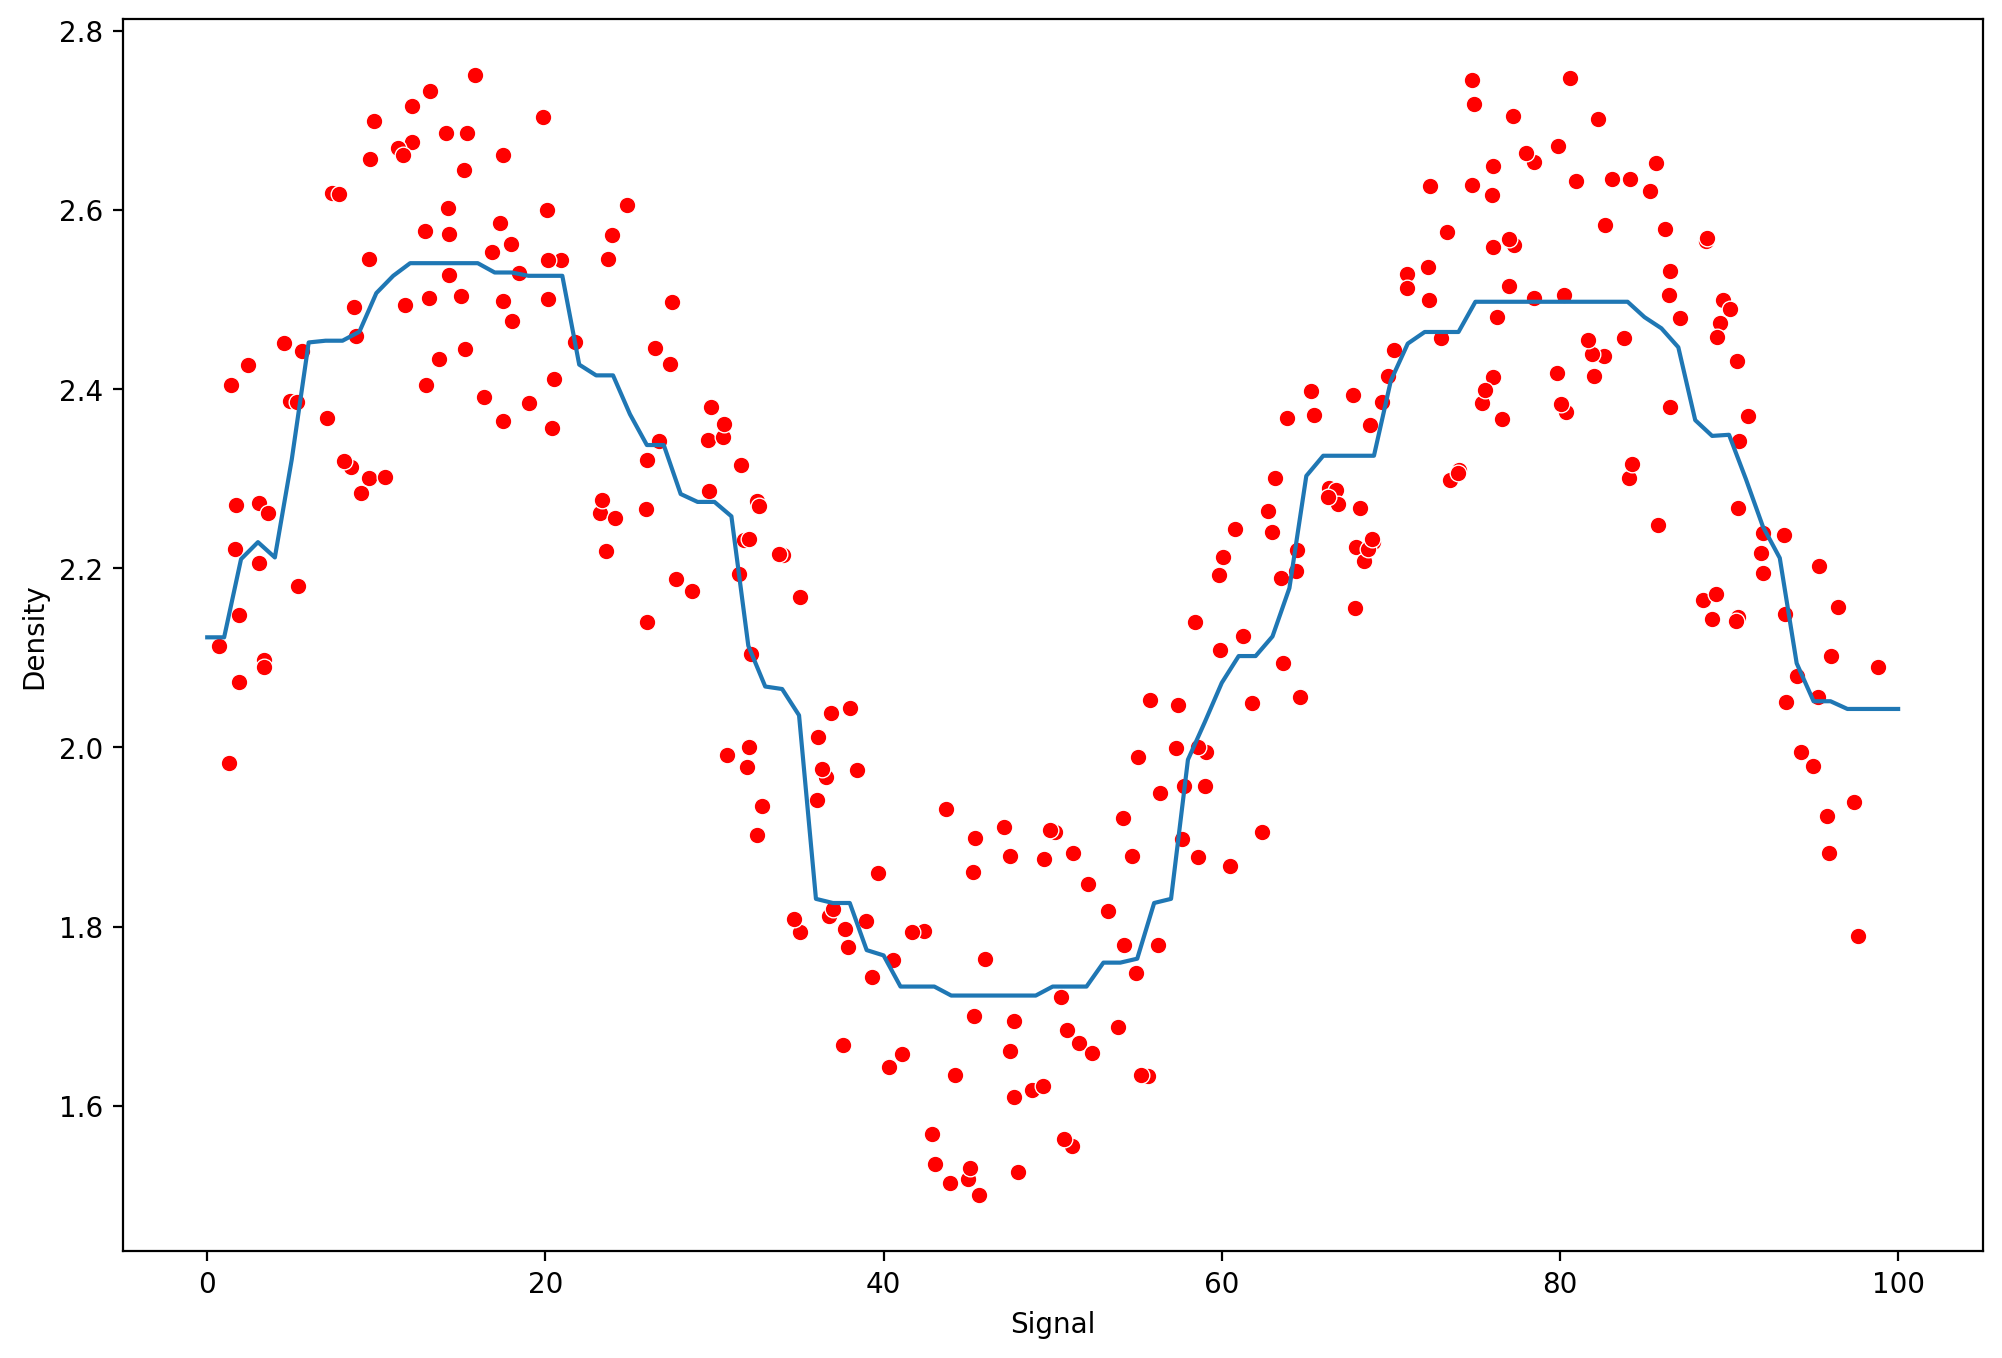

In [110]:
model =AdaBoostRegressor()
run_model(model,X_train,X_test,y_train,y_test)